In [254]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
%matplotlib inline 
import seaborn as sns
sns.set_style('ticks')
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix
import itertools
import xgboost as xgb
from xgboost import plot_importance
import warnings
from datetime import datetime, timedelta
from fbprophet import Prophet
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('file:///Users/chrisfiorentine/Downloads/game_logs.csv')

In [3]:
df = df[df['date'] > 20150000]

In [4]:
#df['date'] = df['date'].apply(lambda date: str(date))

In [5]:
#df['date'] = df['date'].apply(lambda date: datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

In [6]:
df['Run_dif'] = df.h_score - df.v_score

In [7]:
def wins(rd):
    if rd > 0:
        return 1
    if rd < 0:
        return 0

In [8]:
df['Win'] = df['Run_dif'].apply(wins)

In [9]:
drop_columns = ['v_line_score','h_line_score','1b_umpire_id', '1b_umpire_name','2b_umpire_id','2b_umpire_name',
                   '3b_umpire_id','3b_umpire_name','lf_umpire_id','lf_umpire_name','rf_umpire_id','rf_umpire_name',
                   'winning_rbi_batter_id','winning_rbi_batter_id_name','winning_pitcher_id',
                   'winning_pitcher_name','losing_pitcher_id','losing_pitcher_name','saving_pitcher_id',
                   'saving_pitcher_name','additional_info','acquisition_info','number_of_game','day_of_week',
                    'v_league','v_game_number','h_league','h_game_number','length_outs','day_night',
                   'completion','forefeit','protest','park_id','length_minutes','v_starting_pitcher_name','v_player_1_id','v_player_1_name',
                     'v_player_1_def_pos','v_player_2_id','v_player_3_id','v_player_4_id','v_player_5_id',
                     'v_player_6_id','v_player_7_id','v_player_8_id','v_player_9_id','v_player_2_name',
                     'v_player_3_name','v_player_4_name','v_player_5_name','v_player_6_name','v_player_7_name',
                     'v_player_8_name','v_player_9_name','v_player_2_def_pos','v_player_3_def_pos',
                     'v_player_4_def_pos','v_player_5_def_pos','v_player_6_def_pos','v_player_7_def_pos',
                     'v_player_8_def_pos','v_player_9_def_pos','h_player_2_def_pos', 'h_player_3_id', 'h_player_3_name',
       'h_player_3_def_pos', 'h_player_4_id', 'h_player_4_name',
       'h_player_4_def_pos', 'h_player_5_id', 'h_player_5_name',
       'h_player_5_def_pos', 'h_player_6_id', 'h_player_6_name',
       'h_player_6_def_pos', 'h_player_7_id', 'h_player_7_name',
       'h_player_7_def_pos', 'h_player_8_id', 'h_player_8_name',
       'h_player_8_def_pos', 'h_player_9_id', 'h_player_9_name',
       'h_player_9_def_pos','hp_umpire_id', 'hp_umpire_name',
       'h_manager_id', 'h_manager_name',
       'h_starting_pitcher_name', 'h_player_1_id', 'h_player_1_name','v_manager_id', 'v_manager_name',
       'h_player_1_def_pos', 'h_player_2_id', 'h_player_2_name','v_starting_pitcher_id','h_starting_pitcher_id']

In [10]:
df = df.drop(columns = drop_columns)

In [11]:
df.dropna(inplace = True)

In [12]:
df['h_xbh'] = df.h_doubles + df.h_triples + df.h_homeruns

In [13]:
df = df.drop(columns = ['h_doubles','h_triples','h_homeruns'])

In [14]:
df['v_xbh'] = df.v_doubles + df.v_triples + df.v_homeruns

In [15]:
df = df.drop(columns = ['v_doubles','v_triples','v_homeruns'])

In [16]:
df['v_pitcher_allowed_on_base'] = df.h_walks + df['h_intentional walks'] + df.h_hit_by_pitch

In [17]:
df['h_pitcher_allowed_on_base'] = df.v_walks + df['v_intentional walks'] + df.v_hit_by_pitch

In [18]:
df = df.drop(columns = ['v_walks','v_intentional walks','h_hit_by_pitch'])

In [19]:
df = df.drop(columns = ['h_walks','h_intentional walks','v_hit_by_pitch'])

In [20]:
df['v_advanced_runner'] = df.v_sacrifice_hits + df.v_sacrifice_flies +df.v_stolen_bases

In [21]:
df['h_advanced_runner'] = df.h_sacrifice_hits + df.h_sacrifice_flies +df.h_stolen_bases

In [22]:
df = df.drop(columns = ['h_sacrifice_hits','h_sacrifice_flies','h_stolen_bases'])

In [23]:
df = df.drop(columns = ['v_sacrifice_hits','v_sacrifice_flies','v_stolen_bases'])

In [24]:
df['v_pitcher_allowed_runner_advance'] = df.v_wild_pitches + df.v_balks + df.v_passed_balls

In [25]:
df['h_pitcher_allowed_runner_advance'] = df.h_wild_pitches + df.h_balks + df.h_passed_balls

In [26]:
df = df.drop(columns = ['v_wild_pitches','v_balks','v_passed_balls','h_wild_pitches','h_balks','h_passed_balls'])

In [27]:
df

,date,v_name,h_name,v_score,h_score,attendance,v_at_bats,v_hits,v_rbi,v_strikeouts,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_putouts,v_assists,v_errors,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_rbi,h_strikeouts,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_putouts,h_assists,h_errors,h_double_plays,h_triple_plays,Run_dif,Win,h_xbh,v_xbh,v_pitcher_allowed_on_base,h_pitcher_allowed_on_base,v_advanced_runner,h_advanced_runner,v_pitcher_allowed_runner_advance,h_pitcher_allowed_runner_advance
167050,20150405,SLN,CHN,3,0,35055.0,36.0,10.0,3.0,11.0,1.0,0.0,0.0,10.0,4.0,0.0,0.0,27.0,8.0,0.0,0.0,0.0,32.0,5.0,0.0,12.0,0.0,0.0,0.0,7.0,6.0,3.0,3.0,27.0,8.0,2.0,0.0,0.0,-3,0.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,0.0
167051,20150406,MIN,DET,0,4,45030.0,31.0,5.0,0.0,6.0,0.0,1.0,0.0,4.0,2.0,4.0,4.0,24.0,6.0,0.0,2.0,0.0,31.0,10.0,4.0,6.0,0.0,2.0,0.0,6.0,2.0,0.0,0.0,27.0,9.0,0.0,1.0,0.0,4,1.0,4.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
167052,20150406,CLE,HOU,0,2,43753.0,29.0,3.0,0.0,7.0,0.0,1.0,0.0,5.0,2.0,2.0,2.0,24.0,10.0,0.0,0.0,0.0,25.0,3.0,2.0,7.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,27.0,13.0,0.0,1.0,0.0,2,1.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0
167053,20150406,CHA,KCA,1,10,40085.0,28.0,5.0,1.0,3.0,0.0,3.0,0.0,3.0,3.0,10.0,10.0,24.0,7.0,0.0,2.0,0.0,34.0,13.0,9.0,3.0,0.0,1.0,0.0,8.0,4.0,1.0,1.0,27.0,16.0,0.0,3.0,0.0,9,1.0,5.0,2.0,8.0,3.0,0.0,3.0,1.0,0.0
167054,20150406,TOR,NYA,6,1,48469.0,33.0,6.0,5.0,12.0,0.0,0.0,0.0,6.0,3.0,1.0,1.0,27.0,4.0,0.0,0.0,0.0,29.0,3.0,1.0,5.0,1.0,0.0,0.0,5.0,6.0,5.0,5.0,27.0,6.0,1.0,0.0,0.0,-5,0.0,1.0,2.0,4.0,5.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,MIL,COL,6,4,27762.0,39.0,10.0,6.0,12.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,30.0,12.0,1.0,0.0,0.0,41.0,13.0,4.0,11.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,30.0,13.0,0.0,0.0,0.0,-2,0.0,5.0,7.0,4.0,5.0,2.0,1.0,1.0,0.0
171903,20161002,NYN,PHI,2,5,36935.0,33.0,8.0,2.0,9.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,24.0,12.0,3.0,2.0,0.0,33.0,10.0,3.0,3.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,27.0,7.0,0.0,1.0,0.0,3,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
171904,20161002,LAN,SFN,1,7,41445.0,30.0,4.0,1.0,7.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,24.0,5.0,1.0,0.0,0.0,39.0,16.0,7.0,11.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,27.0,7.0,0.0,1.0,0.0,6,1.0,4.0,0.0,5.0,2.0,0.0,2.0,0.0,0.0
171905,20161002,PIT,SLN,4,10,44615.0,35.0,9.0,4.0,11.0,1.0,0.0,0.0,8.0,6.0,8.0,8.0,24.0,2.0,2.0,0.0,0.0,36.0,12.0,10.0,5.0,0.0,0.0,0.0,8.0,3.0,4.0,4.0,27.0,7.0,0.0,1.0,0.0,6,1.0,3.0,1.0,4.0,4.0,0.0,2.0,0.0,0.0


In [28]:
train = df.head(3993)
last_30_days = train.tail(381)

In [29]:
test = df.tail(861)
test

,date,v_name,h_name,v_score,h_score,attendance,v_at_bats,v_hits,v_rbi,v_strikeouts,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_putouts,v_assists,v_errors,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_rbi,h_strikeouts,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_putouts,h_assists,h_errors,h_double_plays,h_triple_plays,Run_dif,Win,h_xbh,v_xbh,v_pitcher_allowed_on_base,h_pitcher_allowed_on_base,v_advanced_runner,h_advanced_runner,v_pitcher_allowed_runner_advance,h_pitcher_allowed_runner_advance
171045,20160801,MIN,CLE,12,5,15018.0,45.0,19.0,12.0,9.0,1.0,0.0,0.0,10.0,3.0,5.0,5.0,27.0,7.0,0.0,0.0,0.0,34.0,7.0,5.0,10.0,0.0,0.0,0.0,4.0,6.0,12.0,12.0,27.0,10.0,0.0,0.0,0.0,-7,0.0,2.0,10.0,2.0,4.0,0.0,0.0,0.0,0.0
171046,20160801,TOR,HOU,1,2,20623.0,48.0,6.0,1.0,22.0,0.0,0.0,0.0,8.0,7.0,2.0,2.0,39.0,13.0,1.0,0.0,0.0,46.0,7.0,2.0,18.0,0.0,0.0,0.0,8.0,7.0,1.0,1.0,42.0,9.0,0.0,0.0,0.0,1,1.0,2.0,2.0,4.0,3.0,0.0,1.0,1.0,2.0
171047,20160801,BOS,SEA,2,1,29601.0,31.0,5.0,2.0,6.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0,27.0,10.0,0.0,1.0,0.0,31.0,4.0,1.0,12.0,0.0,0.0,0.0,8.0,3.0,2.0,2.0,27.0,8.0,0.0,1.0,0.0,-1,0.0,2.0,3.0,6.0,0.0,0.0,0.0,2.0,0.0
171048,20160801,KCA,TBA,3,0,13976.0,31.0,9.0,3.0,7.0,0.0,2.0,0.0,6.0,2.0,0.0,0.0,27.0,2.0,1.0,0.0,0.0,28.0,1.0,0.0,17.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,27.0,15.0,0.0,2.0,0.0,-3,0.0,1.0,2.0,1.0,1.0,4.0,0.0,0.0,2.0
171049,20160801,WAS,ARI,14,1,17518.0,44.0,19.0,14.0,1.0,0.0,0.0,0.0,10.0,4.0,1.0,1.0,27.0,8.0,0.0,0.0,0.0,31.0,5.0,1.0,9.0,0.0,0.0,0.0,6.0,6.0,13.0,13.0,27.0,11.0,1.0,0.0,0.0,-13,0.0,1.0,5.0,2.0,5.0,3.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171902,20161002,MIL,COL,6,4,27762.0,39.0,10.0,6.0,12.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,30.0,12.0,1.0,0.0,0.0,41.0,13.0,4.0,11.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,30.0,13.0,0.0,0.0,0.0,-2,0.0,5.0,7.0,4.0,5.0,2.0,1.0,1.0,0.0
171903,20161002,NYN,PHI,2,5,36935.0,33.0,8.0,2.0,9.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,24.0,12.0,3.0,2.0,0.0,33.0,10.0,3.0,3.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,27.0,7.0,0.0,1.0,0.0,3,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
171904,20161002,LAN,SFN,1,7,41445.0,30.0,4.0,1.0,7.0,0.0,1.0,0.0,4.0,7.0,7.0,7.0,24.0,5.0,1.0,0.0,0.0,39.0,16.0,7.0,11.0,1.0,0.0,0.0,12.0,2.0,1.0,1.0,27.0,7.0,0.0,1.0,0.0,6,1.0,4.0,0.0,5.0,2.0,0.0,2.0,0.0,0.0
171905,20161002,PIT,SLN,4,10,44615.0,35.0,9.0,4.0,11.0,1.0,0.0,0.0,8.0,6.0,8.0,8.0,24.0,2.0,2.0,0.0,0.0,36.0,12.0,10.0,5.0,0.0,0.0,0.0,8.0,3.0,4.0,4.0,27.0,7.0,0.0,1.0,0.0,6,1.0,3.0,1.0,4.0,4.0,0.0,2.0,0.0,0.0


In [30]:
feature_drops = ['v_name','date','h_name','v_score','h_score','v_rbi','v_first_catcher_interference',
                 'v_pitchers_used','v_individual_earned_runs','v_team_earned_runs','v_putouts','v_assists',
                 'h_rbi','h_first_catcher_interference','h_pitchers_used','h_individual_earned_runs',
                 'h_team_earned_runs','h_putouts','h_assists','Run_dif','Win','h_triple_plays','v_triple_plays',
                 'v_at_bats','h_at_bats','date']

In [31]:
X_train = train.drop(columns = feature_drops)

In [32]:
Y_train = train['Win']

In [33]:
X_test = test.drop(columns = feature_drops)

In [34]:
Y_test = test['Win']

In [35]:
lr = LogisticRegression(solver='liblinear',class_weight='balanced')

lr.fit(X_train, Y_train)

lr_pred_test = lr.predict(X_test)


print('Test Accuracy score: ', accuracy_score(Y_test, lr_pred_test))


print('Test F1 score: ', f1_score(Y_test, lr_pred_test))

Test Accuracy score:  0.9512195121951219
Test F1 score:  0.9534368070953436


In [36]:
#test['date'] = test['date'].apply(lambda date: str(date))

In [37]:
#test['date'] = test['date'].apply(lambda date: datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

In [38]:
# test2 = []
# for i in test['date']:
#     test2.append(i - timedelta(days = 30))
#     test2.append(i - timedelta(days = 29))
#     test2.append(i - timedelta(days = 28))
#     test2.append(i - timedelta(days = 27))
#     test2.append(i - timedelta(days = 26))
#     test2.append(i - timedelta(days = 25))
#     test2.append(i - timedelta(days = 24))
#     test2.append(i - timedelta(days = 23))
#     test2.append(i - timedelta(days = 22))
#     test2.append(i - timedelta(days = 21))
#     test2.append(i - timedelta(days = 20))
#     test2.append(i - timedelta(days = 19))
#     test2.append(i - timedelta(days = 18))
#     test2.append(i - timedelta(days = 17))
#     test2.append(i - timedelta(days = 16))
#     test2.append(i - timedelta(days = 15))
#     test2.append(i - timedelta(days = 14))
#     test2.append(i - timedelta(days = 13))
#     test2.append(i - timedelta(days = 12))
#     test2.append(i - timedelta(days = 11))
#     test2.append(i - timedelta(days = 10))
#     test2.append(i - timedelta(days = 9))
#     test2.append(i - timedelta(days = 8))
#     test2.append(i - timedelta(days = 7))
#     test2.append(i - timedelta(days = 6))
#     test2.append(i - timedelta(days = 5))
#     test2.append(i - timedelta(days = 4))
#     test2.append(i - timedelta(days = 3))
#     test2.append(i - timedelta(days = 2))
#     test2.append(i - timedelta(days = 1))    

In [39]:
# test2 = pd.Series(test2)

In [40]:
# test2 = pd.DataFrame(test2)

In [41]:
# test2 = test2.rename(columns = {0:'date'})

In [42]:
# def to_integer(dt_time):
#     return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [43]:
# test2.date = test2.date.apply(to_integer)

In [44]:
# last_30_df = test2.merge(df, on = 'date')

In [45]:
# last_30_df = last_30_df.drop_duplicates()

In [46]:
# last_30_df2 = last_30_df.copy()

In [47]:
# y_train = last_30_df['Run_dif']

In [48]:
# y_train30 = last_30_df['Win']

In [49]:
# last_30_df = last_30_df.drop(columns = feature_drops)

In [50]:
# last_30_df2

In [51]:
# x_test = test.drop(columns = feature_drops)

In [52]:
# scaler = StandardScaler()
# scaler.fit(last_30_df)
# last_30_df =pd.DataFrame(data=scaler.transform(last_30_df), columns= last_30_df.columns)
# x_test =pd.DataFrame(data=scaler.transform(x_test), columns = last_30_df.columns)

In [53]:
# y_test = test['Run_dif']

In [54]:
# y_test30 = test['Win']

In [55]:
# lm = LinearRegression()
# lm = lm.fit(last_30_df, y_train)
# y_test_pred = lm.predict(x_test)
# test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
# print('Training Root Mean Squared Error:' , test_rmse)

In [56]:
# days_30_lr = LogisticRegression(solver='liblinear',class_weight='balanced')

# days_30_lr.fit(last_30_df, y_train30)

# days_30_lr_pred_test = days_30_lr.predict(x_test)


# print('Test Accuracy score: ', accuracy_score(y_test30, days_30_lr_pred_test))


# print('Test F1 score: ', f1_score(y_test30, days_30_lr_pred_test))

In [57]:
# last30 = train.tail(437)
# last30

In [58]:
home_last30_mean = last_30_days.groupby('h_name').mean()

In [59]:
home_last30_mean = home_last30_mean.reset_index()

In [60]:
# start_of_season_df = train.tail(913)
# home_start_df = start_of_season_df.groupby('h_name').mean()
# away_start_df = start_of_season_df.groupby('v_name').mean()

# Get Team Dummies Modeling

In [61]:
df_team_dummies = pd.get_dummies(df, columns = ['v_name','h_name'], drop_first = True)

In [62]:
dummy_feature_drops = ['date','v_score','h_score','v_rbi','v_first_catcher_interference',
                 'v_pitchers_used','v_individual_earned_runs','v_team_earned_runs','v_putouts','v_assists',
                 'h_rbi','h_first_catcher_interference','h_pitchers_used','h_individual_earned_runs',
                 'h_team_earned_runs','h_putouts','h_assists','Run_dif','Win','h_triple_plays','v_triple_plays',
                 'v_at_bats','h_at_bats']

In [63]:
#x_dummy_team_train = df_team_dummies.drop(columns = dummy_feature_drops).head(3340)

In [64]:
#x_dummy_team_test = df_team_dummies.drop(columns = dummy_feature_drops).tail(1514)

In [65]:
#y_dummy_team_train = df_team_dummies['Win'].head(3340)

In [66]:
#y_dummy_team_test = df_team_dummies['Win'].tail(1514)

In [67]:
# scaler.fit(x_dummy_team_train)
# x_dummy_team_train =pd.DataFrame(data=scaler.transform(x_dummy_team_train), columns= x_dummy_team_train.columns)
# x_dummy_team_test =pd.DataFrame(data=scaler.transform(x_dummy_team_test), columns = x_dummy_team_test.columns)

In [68]:
# dummy_teams_lr = LogisticRegression(solver='liblinear',class_weight='balanced')

# dummy_teams_lr.fit(x_dummy_team_train, y_dummy_team_train)

# dummy_teams_lr_pred_test = dummy_teams_lr.predict(x_dummy_team_test)


# print('Test Accuracy score: ', accuracy_score(y_dummy_team_test, dummy_teams_lr_pred_test))


# print('Test F1 score: ', f1_score(y_dummy_team_test, dummy_teams_lr_pred_test))

In [69]:
# lr_coef02 = pd.DataFrame(data=dummy_teams_lr.coef_).T
# lr_coef02 = lr_coef02.set_index(x_dummy_team_train.columns)
# lr_coef02 = lr_coef02.sort_values(by = 0, ascending = False).T

In [70]:
# lr_coef02.T.head(50)

In [71]:
home_last30_mean

,h_name,date,v_score,h_score,attendance,v_at_bats,v_hits,v_rbi,v_strikeouts,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_putouts,v_assists,v_errors,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_rbi,h_strikeouts,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_putouts,h_assists,h_errors,h_double_plays,h_triple_plays,Run_dif,Win,h_xbh,v_xbh,v_pitcher_allowed_on_base,h_pitcher_allowed_on_base,v_advanced_runner,h_advanced_runner,v_pitcher_allowed_runner_advance,h_pitcher_allowed_runner_advance
0,ANA,2.016072e+07,3.000000,5.200000,39104.100000,33.700000,7.900000,3.000000,8.000000,0.500000,0.400000,0.000000,7.200000,3.000000,4.800000,4.700000,24.700000,11.100000,0.700000,1.700000,0.000000,31.100000,8.600000,4.700000,4.900000,0.100000,1.600000,0.000000,4.600000,3.900000,2.800000,2.800000,27.000000,8.200000,0.400000,0.700000,0.000000,2.200000,0.800000,2.800000,2.700000,3.000000,3.300000,0.800000,0.900000,0.400000,0.300000
1,ARI,2.016071e+07,6.909091,4.636364,27074.181818,38.272727,11.000000,6.727273,9.545455,0.272727,0.818182,0.000000,7.636364,4.272727,4.363636,4.363636,27.272727,12.090909,0.363636,0.727273,0.000000,35.727273,9.636364,4.363636,8.454545,0.181818,0.636364,0.000000,6.272727,5.090909,5.818182,5.818182,28.363636,10.636364,0.727273,0.909091,0.000000,-2.272727,0.363636,4.000000,4.363636,2.363636,4.545455,0.818182,1.363636,0.636364,0.545455
2,ATL,2.016072e+07,4.600000,3.600000,25286.600000,35.300000,8.800000,3.700000,6.900000,0.000000,0.900000,0.000000,8.100000,4.100000,3.300000,3.300000,26.900000,10.700000,0.400000,1.200000,0.000000,34.000000,9.000000,3.500000,6.900000,0.200000,1.100000,0.000000,8.200000,5.100000,3.800000,3.800000,27.900000,10.400000,0.900000,1.100000,0.000000,-1.000000,0.400000,2.300000,2.400000,4.200000,5.000000,1.200000,1.100000,0.600000,1.100000
3,BAL,2.016072e+07,3.333333,3.777778,32561.666667,32.555556,7.222222,3.111111,7.333333,0.444444,1.333333,0.000000,5.888889,4.222222,3.333333,3.333333,25.666667,8.888889,0.666667,1.111111,0.000000,32.555556,8.333333,3.444444,7.222222,0.111111,1.000000,0.000000,7.000000,3.444444,2.777778,2.777778,27.333333,9.222222,0.444444,1.555556,0.000000,0.444444,0.666667,2.444444,1.444444,3.333333,3.555556,0.555556,0.555556,0.444444,1.000000
4,BOS,2.016071e+07,5.555556,6.388889,37229.166667,36.333333,10.944444,5.333333,7.833333,0.166667,0.888889,0.000000,7.277778,3.833333,5.611111,5.611111,25.166667,10.777778,0.722222,1.055556,0.000000,35.277778,11.166667,6.111111,5.722222,0.111111,0.944444,0.000000,7.277778,4.222222,4.944444,4.944444,27.000000,9.944444,0.666667,1.055556,0.000000,0.833333,0.611111,4.500000,3.500000,3.444444,3.222222,0.888889,0.833333,0.222222,0.500000
5,CHA,2.016072e+07,4.000000,4.083333,28461.250000,35.333333,9.583333,3.833333,7.666667,0.000000,0.416667,0.250000,8.666667,3.250000,3.750000,3.750000,24.833333,9.583333,0.750000,1.333333,0.000000,32.000000,8.583333,4.000000,6.833333,0.250000,1.166667,0.000000,6.500000,4.166667,3.666667,3.666667,26.500000,9.416667,1.333333,0.666667,0.083333,0.083333,0.583333,2.166667,4.000000,2.833333,3.916667,0.666667,1.250000,0.416667,0.583333
6,CHN,2.016072e+07,3.000000,4.933333,41268.800000,33.666667,6.933333,2.733333,8.533333,0.200000,0.600000,0.000000,6.266667,3.866667,4.400000,4.400000,26.266667,8.800000,0.733333,0.666667,0.000000,33.333333,7.933333,4.533333,8.266667,0.066667,0.533333,0.000000,7.400000,4.200000,2.800000,2.800000,28.000000,10.800000,0.266667,0.600000,0.000000,1.933333,0.600000,2.866667,2.266667,4.800000,3.133333,1.400000,1.266667,0.266667,0.666667
7,CIN,2.016072e+07,3.888889,5.000000,25085.777778,34.555556,8.333333,3.666667,8.333333,0.444444,0.444444,0.000000,6.444444,4.111111,4.444444,4.444444,25.888889,10.000000,0.444444,1.333333,0.000000,34.000000,9.666667,4.666667,7.777778,0.444444,1.111111,0.000000,7.444

In [72]:
away_last30 = last_30_days.copy()

In [73]:
away_last30['Run_dif'] = -away_last30['Run_dif']

In [74]:
away_last30['Win'] = away_last30['Run_dif'].apply(wins)

In [75]:
away_last30_mean = away_last30.groupby('v_name').mean()

In [76]:
away_last30_mean = away_last30_mean.reset_index()

In [77]:
away_last30_mean

,v_name,date,v_score,h_score,attendance,v_at_bats,v_hits,v_rbi,v_strikeouts,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_putouts,v_assists,v_errors,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_rbi,h_strikeouts,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_putouts,h_assists,h_errors,h_double_plays,h_triple_plays,Run_dif,Win,h_xbh,v_xbh,v_pitcher_allowed_on_base,h_pitcher_allowed_on_base,v_advanced_runner,h_advanced_runner,v_pitcher_allowed_runner_advance,h_pitcher_allowed_runner_advance
0,ANA,2.016071e+07,6.250000,4.500000,30170.937500,35.812500,10.750000,5.937500,6.000000,0.187500,0.937500,0.000000,8.062500,4.062500,4.187500,4.187500,25.312500,8.000000,0.750000,0.812500,0.0,33.687500,9.812500,4.062500,6.937500,0.312500,0.625000,0.000000,7.375000,3.937500,5.437500,5.437500,27.000000,9.750000,1.062500,1.250000,0.0000,1.750000,0.437500,3.250000,3.375000,3.375000,4.562500,1.437500,0.437500,0.375000,0.812500
1,ARI,2.016072e+07,3.692308,6.307692,34430.769231,34.076923,7.461538,3.461538,9.000000,0.230769,0.538462,0.000000,6.230769,4.230769,5.615385,5.615385,24.692308,8.615385,0.461538,1.000000,0.0,33.153846,9.692308,6.000000,8.615385,0.307692,0.615385,0.000000,7.076923,4.307692,3.076923,3.076923,27.000000,10.307692,1.000000,0.538462,0.0000,-2.615385,0.230769,3.923077,2.615385,5.076923,2.769231,0.538462,1.230769,0.615385,0.461538
2,ATL,2.016072e+07,3.750000,5.250000,28378.312500,34.562500,8.437500,3.625000,7.562500,0.125000,0.937500,0.000000,6.500000,4.187500,4.937500,4.937500,25.875000,9.562500,0.687500,1.125000,0.0,34.000000,9.687500,5.125000,6.812500,0.375000,0.937500,0.000000,6.562500,3.937500,3.500000,3.500000,27.750000,11.562500,0.687500,1.250000,0.0625,-1.500000,0.375000,3.437500,3.437500,3.500000,3.187500,0.875000,1.312500,0.562500,0.562500
3,BAL,2.016072e+07,3.235294,5.000000,34301.352941,35.411765,7.941176,3.117647,8.588235,0.000000,0.647059,0.000000,6.705882,3.882353,5.000000,5.000000,26.470588,9.411765,0.176471,0.941176,0.0,33.352941,8.588235,4.941176,8.058824,0.176471,0.882353,0.058824,7.000000,4.294118,3.117647,3.117647,28.411765,9.705882,0.529412,0.647059,0.0000,-1.764706,0.352941,4.117647,2.470588,5.058824,2.823529,0.352941,0.647059,0.470588,0.529412
4,BOS,2.016072e+07,3.571429,2.857143,43103.571429,33.142857,7.285714,3.571429,8.571429,0.428571,0.571429,0.000000,7.142857,2.857143,2.571429,2.571429,25.857143,10.142857,0.428571,1.000000,0.0,32.285714,7.714286,2.571429,4.714286,0.142857,1.000000,0.000000,5.714286,4.142857,3.428571,3.428571,27.000000,8.000000,0.571429,0.714286,0.0000,0.714286,0.571429,1.571429,1.857143,2.142857,4.428571,0.571429,0.142857,0.142857,0.428571
5,CHA,2.016072e+07,2.785714,4.500000,33233.500000,35.357143,8.285714,2.642857,8.500000,0.142857,0.928571,0.000000,6.785714,3.642857,4.071429,4.000000,26.428571,10.000000,0.785714,1.142857,0.0,31.785714,6.714286,4.285714,7.071429,0.071429,1.000000,0.000000,5.428571,3.857143,2.571429,2.571429,28.285714,10.214286,0.428571,1.000000,0.0000,-1.714286,0.285714,3.214286,3.071429,4.428571,2.500000,0.357143,0.714286,0.142857,0.142857
6,CHN,2.016071e+07,3.636364,6.727273,39321.727273,34.454545,9.000000,3.454545,8.090909,0.454545,1.090909,0.090909,8.090909,4.363636,6.636364,6.636364,24.909091,8.818182,0.636364,0.454545,0.0,33.272727,9.272727,6.454545,9.090909,0.181818,0.272727,0.000000,7.000000,4.363636,3.000000,2.909091,27.000000,9.454545,1.000000,1.181818,0.0000,-3.090909,0.272727,3.727273,3.090909,4.909091,4.000000,0.727273,2.090909,0.636364,0.363636
7,CIN,2.016071e+07,4.133333,4.666667,34072.400000,35.333333,8.600000,3.866667,7.800000,0.200000,0.600000,0.000000,6.333333,3.533333,4.200000,4.200000,26.933333,9.000000,0.466667,1.000000,0.0,33.733333,8.066667,4.266667,8.866667,0.133333,0.866667,0.066667,7.000000,4.600000,3.800000,3.733333,28.400000,9.800000,0.7333

# Defining Functions For 30 Days

## Home AVG RD

In [78]:
def home_last_30_days_rd(i):
        if i == 'ANA':
            return home_last30_mean['Run_dif'].loc[0]
        if i == 'ARI':
            return home_last30_mean['Run_dif'].loc[1]
        if i == 'ATL':
            return home_last30_mean['Run_dif'].loc[2]
        if i == 'BAL':
            return home_last30_mean['Run_dif'].loc[3]
        if i == 'BOS':
            return home_last30_mean['Run_dif'].loc[4]
        if i == 'CHA':
            return home_last30_mean['Run_dif'].loc[5]
        if i == 'CHN':
            return home_last30_mean['Run_dif'].loc[6]
        if i == 'CIN':
            return home_last30_mean['Run_dif'].loc[7]
        if i == 'CLE':
            return home_last30_mean['Run_dif'].loc[8]
        if i == 'COL':
            return home_last30_mean['Run_dif'].loc[9]
        if i == 'DET':
            return home_last30_mean['Run_dif'].loc[10]
        if i == 'HOU':
            return home_last30_mean['Run_dif'].loc[11]
        if i == 'KCA':
            return home_last30_mean['Run_dif'].loc[12]
        if i == 'LAN':
            return home_last30_mean['Run_dif'].loc[13]
        if i == 'MIA':
            return home_last30_mean['Run_dif'].loc[14]
        if i == 'MIL':
            return home_last30_mean['Run_dif'].loc[15]
        if i == 'MIN':
            return home_last30_mean['Run_dif'].loc[16]
        if i == 'NYA':
            return home_last30_mean['Run_dif'].loc[17]
        if i == 'NYN':
            return home_last30_mean['Run_dif'].loc[18]
        if i == 'OAK':
            return home_last30_mean['Run_dif'].loc[19]
        if i == 'PHI':
            return home_last30_mean['Run_dif'].loc[20]
        if i == 'PIT':
            return home_last30_mean['Run_dif'].loc[21]
        if i == 'SDN':
            return home_last30_mean['Run_dif'].loc[22]
        if i == 'SEA':
            return home_last30_mean['Run_dif'].loc[23]
        if i == 'SFN':
            return home_last30_mean['Run_dif'].loc[24]
        if i == 'SLN':
            return home_last30_mean['Run_dif'].loc[25]
        if i == 'TBA':
            return home_last30_mean['Run_dif'].loc[26]
        if i == 'TEX':
            return home_last30_mean['Run_dif'].loc[27]
        if i == 'TOR':
            return home_last30_mean['Run_dif'].loc[28]
        if i == 'WAS':
            return home_last30_mean['Run_dif'].loc[29]

## Away AVG RD

In [79]:
def away_last_30_days_rd(i):
        if i == 'ANA':
            return away_last30_mean['Run_dif'].loc[0]
        if i == 'ARI':
            return away_last30_mean['Run_dif'].loc[1]
        if i == 'ATL':
            return away_last30_mean['Run_dif'].loc[2]
        if i == 'BAL':
            return away_last30_mean['Run_dif'].loc[3]
        if i == 'BOS':
            return away_last30_mean['Run_dif'].loc[4]
        if i == 'CHA':
            return away_last30_mean['Run_dif'].loc[5]
        if i == 'CHN':
            return away_last30_mean['Run_dif'].loc[6]
        if i == 'CIN':
            return away_last30_mean['Run_dif'].loc[7]
        if i == 'CLE':
            return away_last30_mean['Run_dif'].loc[8]
        if i == 'COL':
            return away_last30_mean['Run_dif'].loc[9]
        if i == 'DET':
            return away_last30_mean['Run_dif'].loc[10]
        if i == 'HOU':
            return away_last30_mean['Run_dif'].loc[11]
        if i == 'KCA':
            return away_last30_mean['Run_dif'].loc[12]
        if i == 'LAN':
            return away_last30_mean['Run_dif'].loc[13]
        if i == 'MIA':
            return away_last30_mean['Run_dif'].loc[14]
        if i == 'MIL':
            return away_last30_mean['Run_dif'].loc[15]
        if i == 'MIN':
            return away_last30_mean['Run_dif'].loc[16]
        if i == 'NYA':
            return away_last30_mean['Run_dif'].loc[17]
        if i == 'NYN':
            return away_last30_mean['Run_dif'].loc[18]
        if i == 'OAK':
            return away_last30_mean['Run_dif'].loc[19]
        if i == 'PHI':
            return away_last30_mean['Run_dif'].loc[20]
        if i == 'PIT':
            return away_last30_mean['Run_dif'].loc[21]
        if i == 'SDN':
            return away_last30_mean['Run_dif'].loc[22]
        if i == 'SEA':
            return away_last30_mean['Run_dif'].loc[23]
        if i == 'SFN':
            return away_last30_mean['Run_dif'].loc[24]
        if i == 'SLN':
            return away_last30_mean['Run_dif'].loc[25]
        if i == 'TBA':
            return away_last30_mean['Run_dif'].loc[26]
        if i == 'TEX':
            return away_last30_mean['Run_dif'].loc[27]
        if i == 'TOR':
            return away_last30_mean['Run_dif'].loc[28]
        if i == 'WAS':
            return away_last30_mean['Run_dif'].loc[29]

## Home Win Rate

In [80]:
def home_last_30_days_W(i):
        if i == 'ANA':
            return home_last30_mean['Win'].loc[0]
        if i == 'ARI':
            return home_last30_mean['Win'].loc[1]
        if i == 'ATL':
            return home_last30_mean['Win'].loc[2]
        if i == 'BAL':
            return home_last30_mean['Win'].loc[3]
        if i == 'BOS':
            return home_last30_mean['Win'].loc[4]
        if i == 'CHA':
            return home_last30_mean['Win'].loc[5]
        if i == 'CHN':
            return home_last30_mean['Win'].loc[6]
        if i == 'CIN':
            return home_last30_mean['Win'].loc[7]
        if i == 'CLE':
            return home_last30_mean['Win'].loc[8]
        if i == 'COL':
            return home_last30_mean['Win'].loc[9]
        if i == 'DET':
            return home_last30_mean['Win'].loc[10]
        if i == 'HOU':
            return home_last30_mean['Win'].loc[11]
        if i == 'KCA':
            return home_last30_mean['Win'].loc[12]
        if i == 'LAN':
            return home_last30_mean['Win'].loc[13]
        if i == 'MIA':
            return home_last30_mean['Win'].loc[14]
        if i == 'MIL':
            return home_last30_mean['Win'].loc[15]
        if i == 'MIN':
            return home_last30_mean['Win'].loc[16]
        if i == 'NYA':
            return home_last30_mean['Win'].loc[17]
        if i == 'NYN':
            return home_last30_mean['Win'].loc[18]
        if i == 'OAK':
            return home_last30_mean['Win'].loc[19]
        if i == 'PHI':
            return home_last30_mean['Win'].loc[20]
        if i == 'PIT':
            return home_last30_mean['Win'].loc[21]
        if i == 'SDN':
            return home_last30_mean['Win'].loc[22]
        if i == 'SEA':
            return home_last30_mean['Win'].loc[23]
        if i == 'SFN':
            return home_last30_mean['Win'].loc[24]
        if i == 'SLN':
            return home_last30_mean['Win'].loc[25]
        if i == 'TBA':
            return home_last30_mean['Win'].loc[26]
        if i == 'TEX':
            return home_last30_mean['Win'].loc[27]
        if i == 'TOR':
            return home_last30_mean['Win'].loc[28]
        if i == 'WAS':
            return home_last30_mean['Win'].loc[29]

## Away Win Rate

In [81]:
def away_last_30_days_W(i):
        if i == 'ANA':
            return away_last30_mean['Win'].loc[0]
        if i == 'ARI':
            return away_last30_mean['Win'].loc[1]
        if i == 'ATL':
            return away_last30_mean['Win'].loc[2]
        if i == 'BAL':
            return away_last30_mean['Win'].loc[3]
        if i == 'BOS':
            return away_last30_mean['Win'].loc[4]
        if i == 'CHA':
            return away_last30_mean['Win'].loc[5]
        if i == 'CHN':
            return away_last30_mean['Win'].loc[6]
        if i == 'CIN':
            return away_last30_mean['Win'].loc[7]
        if i == 'CLE':
            return away_last30_mean['Win'].loc[8]
        if i == 'COL':
            return away_last30_mean['Win'].loc[9]
        if i == 'DET':
            return away_last30_mean['Win'].loc[10]
        if i == 'HOU':
            return away_last30_mean['Win'].loc[11]
        if i == 'KCA':
            return away_last30_mean['Win'].loc[12]
        if i == 'LAN':
            return away_last30_mean['Win'].loc[13]
        if i == 'MIA':
            return away_last30_mean['Win'].loc[14]
        if i == 'MIL':
            return away_last30_mean['Win'].loc[15]
        if i == 'MIN':
            return away_last30_mean['Win'].loc[16]
        if i == 'NYA':
            return away_last30_mean['Win'].loc[17]
        if i == 'NYN':
            return away_last30_mean['Win'].loc[18]
        if i == 'OAK':
            return away_last30_mean['Win'].loc[19]
        if i == 'PHI':
            return away_last30_mean['Win'].loc[20]
        if i == 'PIT':
            return away_last30_mean['Win'].loc[21]
        if i == 'SDN':
            return away_last30_mean['Win'].loc[22]
        if i == 'SEA':
            return away_last30_mean['Win'].loc[23]
        if i == 'SFN':
            return away_last30_mean['Win'].loc[24]
        if i == 'SLN':
            return away_last30_mean['Win'].loc[25]
        if i == 'TBA':
            return away_last30_mean['Win'].loc[26]
        if i == 'TEX':
            return away_last30_mean['Win'].loc[27]
        if i == 'TOR':
            return away_last30_mean['Win'].loc[28]
        if i == 'WAS':
            return away_last30_mean['Win'].loc[29]

## Home AVG Hits

In [82]:
def home_last_30_days_hits(i):
        if i == 'ANA':
            return home_last30_mean['h_hits'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_hits'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_hits'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_hits'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_hits'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_hits'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_hits'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_hits'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_hits'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_hits'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_hits'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_hits'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_hits'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_hits'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_hits'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_hits'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_hits'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_hits'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_hits'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_hits'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_hits'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_hits'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_hits'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_hits'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_hits'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_hits'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_hits'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_hits'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_hits'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_hits'].loc[29]

## Away AVG Hits

In [83]:
def away_last_30_days_hits(i):
        if i == 'ANA':
            return away_last30_mean['v_hits'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_hits'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_hits'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_hits'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_hits'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_hits'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_hits'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_hits'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_hits'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_hits'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_hits'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_hits'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_hits'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_hits'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_hits'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_hits'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_hits'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_hits'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_hits'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_hits'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_hits'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_hits'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_hits'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_hits'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_hits'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_hits'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_hits'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_hits'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_hits'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_hits'].loc[29]

## Home AVG Hits Allowed

In [84]:
def home_last_30_days_hits_allowed(i):
        if i == 'ANA':
            return home_last30_mean['v_hits'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_hits'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_hits'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_hits'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_hits'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_hits'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_hits'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_hits'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_hits'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_hits'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_hits'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_hits'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_hits'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_hits'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_hits'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_hits'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_hits'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_hits'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_hits'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_hits'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_hits'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_hits'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_hits'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_hits'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_hits'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_hits'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_hits'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_hits'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_hits'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_hits'].loc[29]

## Away AVG Hits Allowed

In [85]:
def away_last_30_days_hits_allowed(i):
        if i == 'ANA':
            return away_last30_mean['h_hits'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_hits'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_hits'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_hits'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_hits'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_hits'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_hits'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_hits'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_hits'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_hits'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_hits'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_hits'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_hits'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_hits'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_hits'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_hits'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_hits'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_hits'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_hits'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_hits'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_hits'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_hits'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_hits'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_hits'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_hits'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_hits'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_hits'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_hits'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_hits'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_hits'].loc[29]

## Home AVG XBH

In [86]:
def home_last_30_days_xbh(i):
        if i == 'ANA':
            return home_last30_mean['h_xbh'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_xbh'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_xbh'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_xbh'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_xbh'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_xbh'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_xbh'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_xbh'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_xbh'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_xbh'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_xbh'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_xbh'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_xbh'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_xbh'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_xbh'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_xbh'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_xbh'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_xbh'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_xbh'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_xbh'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_xbh'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_xbh'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_xbh'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_xbh'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_xbh'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_xbh'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_xbh'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_xbh'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_xbh'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_xbh'].loc[29]

## Away AVG XBH

In [87]:
def away_last_30_days_xbh(i):
        if i == 'ANA':
            return away_last30_mean['v_xbh'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_xbh'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_xbh'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_xbh'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_xbh'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_xbh'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_xbh'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_xbh'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_xbh'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_xbh'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_xbh'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_xbh'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_xbh'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_xbh'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_xbh'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_xbh'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_xbh'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_xbh'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_xbh'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_xbh'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_xbh'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_xbh'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_xbh'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_xbh'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_xbh'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_xbh'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_xbh'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_xbh'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_xbh'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_xbh'].loc[29]

## Home AVG Allowed XBH

In [88]:
def home_last_30_days_xbh_allowed(i):
        if i == 'ANA':
            return home_last30_mean['v_xbh'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_xbh'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_xbh'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_xbh'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_xbh'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_xbh'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_xbh'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_xbh'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_xbh'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_xbh'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_xbh'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_xbh'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_xbh'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_xbh'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_xbh'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_xbh'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_xbh'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_xbh'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_xbh'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_xbh'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_xbh'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_xbh'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_xbh'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_xbh'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_xbh'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_xbh'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_xbh'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_xbh'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_xbh'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_xbh'].loc[29]

## Away AVG Allowed XBH

In [89]:
def away_last_30_days_xbh_allowed(i):
        if i == 'ANA':
            return away_last30_mean['h_xbh'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_xbh'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_xbh'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_xbh'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_xbh'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_xbh'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_xbh'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_xbh'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_xbh'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_xbh'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_xbh'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_xbh'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_xbh'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_xbh'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_xbh'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_xbh'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_xbh'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_xbh'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_xbh'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_xbh'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_xbh'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_xbh'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_xbh'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_xbh'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_xbh'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_xbh'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_xbh'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_xbh'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_xbh'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_xbh'].loc[29]

## Home AVG Reached Base by Opposing Pitcher

In [90]:
def home_last_30_days_on_base_by_pitcher(i):
        if i == 'ANA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_pitcher_allowed_on_base'].loc[29]

## Away AVG Reached Base by Opposing Pitcher

In [91]:
def away_last_30_days_on_base_by_pitcher(i):
        if i == 'ANA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_pitcher_allowed_on_base'].loc[29]

## Home AVG Allowed Opponents to Reach Base by Pitcher

In [92]:
def home_last_30_days_allowed_on_base(i):
        if i == 'ANA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_pitcher_allowed_on_base'].loc[29]

## Away AVG Allowed Opponents to Reach Base by Pitcher

In [93]:
def away_last_30_days_allowed_on_base(i):
        if i == 'ANA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_pitcher_allowed_on_base'].loc[29]

## Home AVG Runners Advanced 

In [94]:
def home_last_30_days_runners_advanced(i):
        if i == 'ANA':
            return home_last30_mean['h_advanced_runner'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_advanced_runner'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_advanced_runner'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_advanced_runner'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_advanced_runner'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_advanced_runner'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_advanced_runner'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_advanced_runner'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_advanced_runner'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_advanced_runner'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_advanced_runner'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_advanced_runner'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_advanced_runner'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_advanced_runner'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_advanced_runner'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_advanced_runner'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_advanced_runner'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_advanced_runner'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_advanced_runner'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_advanced_runner'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_advanced_runner'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_advanced_runner'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_advanced_runner'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_advanced_runner'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_advanced_runner'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_advanced_runner'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_advanced_runner'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_advanced_runner'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_advanced_runner'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_advanced_runner'].loc[29]

## Away AVG Runners Advanced 

In [95]:
def away_last_30_days_runners_advanced(i):
        if i == 'ANA':
            return away_last30_mean['v_advanced_runner'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_advanced_runner'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_advanced_runner'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_advanced_runner'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_advanced_runner'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_advanced_runner'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_advanced_runner'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_advanced_runner'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_advanced_runner'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_advanced_runner'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_advanced_runner'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_advanced_runner'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_advanced_runner'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_advanced_runner'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_advanced_runner'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_advanced_runner'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_advanced_runner'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_advanced_runner'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_advanced_runner'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_advanced_runner'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_advanced_runner'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_advanced_runner'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_advanced_runner'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_advanced_runner'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_advanced_runner'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_advanced_runner'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_advanced_runner'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_advanced_runner'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_advanced_runner'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_advanced_runner'].loc[29]

## Home AVG Allowed Runners Advance by Pitcher 

In [96]:
def home_last_30_days_pitcher_allowed_runners_advanced(i):
        if i == 'ANA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_pitcher_allowed_runner_advance'].loc[29]

## Away AVG Allowed Runners Advance by Pitcher

In [97]:
def away_last_30_days_pitcher_allowed_runners_advanced(i):
        if i == 'ANA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_pitcher_allowed_runner_advance'].loc[29]

## Home AVG Runners Left On Base

In [98]:
def home_last_30_days_runners_left_on_base(i):
        if i == 'ANA':
            return home_last30_mean['h_left_on_base'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_left_on_base'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_left_on_base'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_left_on_base'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_left_on_base'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_left_on_base'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_left_on_base'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_left_on_base'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_left_on_base'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_left_on_base'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_left_on_base'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_left_on_base'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_left_on_base'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_left_on_base'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_left_on_base'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_left_on_base'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_left_on_base'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_left_on_base'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_left_on_base'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_left_on_base'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_left_on_base'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_left_on_base'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_left_on_base'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_left_on_base'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_left_on_base'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_left_on_base'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_left_on_base'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_left_on_base'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_left_on_base'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_left_on_base'].loc[29]

## Away AVG Runners Left On Base

In [99]:
def away_last_30_days_runners_left_on_base(i):
        if i == 'ANA':
            return away_last30_mean['v_left_on_base'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_left_on_base'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_left_on_base'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_left_on_base'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_left_on_base'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_left_on_base'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_left_on_base'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_left_on_base'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_left_on_base'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_left_on_base'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_left_on_base'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_left_on_base'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_left_on_base'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_left_on_base'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_left_on_base'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_left_on_base'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_left_on_base'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_left_on_base'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_left_on_base'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_left_on_base'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_left_on_base'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_left_on_base'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_left_on_base'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_left_on_base'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_left_on_base'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_left_on_base'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_left_on_base'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_left_on_base'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_left_on_base'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_left_on_base'].loc[29]

## Home AVG Runners Stopped From Scoring

In [100]:
def home_last_30_days_runners_stopped_from_scoring(i):
        if i == 'ANA':
            return home_last30_mean['v_left_on_base'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_left_on_base'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_left_on_base'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_left_on_base'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_left_on_base'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_left_on_base'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_left_on_base'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_left_on_base'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_left_on_base'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_left_on_base'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_left_on_base'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_left_on_base'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_left_on_base'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_left_on_base'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_left_on_base'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_left_on_base'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_left_on_base'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_left_on_base'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_left_on_base'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_left_on_base'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_left_on_base'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_left_on_base'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_left_on_base'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_left_on_base'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_left_on_base'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_left_on_base'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_left_on_base'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_left_on_base'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_left_on_base'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_left_on_base'].loc[29]

## Away AVG Runners Stopped From Scoring

In [101]:
def away_last_30_days_runners_stopped_from_scoring(i):
        if i == 'ANA':
            return away_last30_mean['h_left_on_base'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_left_on_base'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_left_on_base'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_left_on_base'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_left_on_base'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_left_on_base'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_left_on_base'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_left_on_base'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_left_on_base'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_left_on_base'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_left_on_base'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_left_on_base'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_left_on_base'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_left_on_base'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_left_on_base'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_left_on_base'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_left_on_base'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_left_on_base'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_left_on_base'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_left_on_base'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_left_on_base'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_left_on_base'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_left_on_base'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_left_on_base'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_left_on_base'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_left_on_base'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_left_on_base'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_left_on_base'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_left_on_base'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_left_on_base'].loc[29]

## Home AVG Attendance

In [102]:
def home_last_30_days_attendance(i):
        if i == 'ANA':
            return home_last30_mean['attendance'].loc[0]
        if i == 'ARI':
            return home_last30_mean['attendance'].loc[1]
        if i == 'ATL':
            return home_last30_mean['attendance'].loc[2]
        if i == 'BAL':
            return home_last30_mean['attendance'].loc[3]
        if i == 'BOS':
            return home_last30_mean['attendance'].loc[4]
        if i == 'CHA':
            return home_last30_mean['attendance'].loc[5]
        if i == 'CHN':
            return home_last30_mean['attendance'].loc[6]
        if i == 'CIN':
            return home_last30_mean['attendance'].loc[7]
        if i == 'CLE':
            return home_last30_mean['attendance'].loc[8]
        if i == 'COL':
            return home_last30_mean['attendance'].loc[9]
        if i == 'DET':
            return home_last30_mean['attendance'].loc[10]
        if i == 'HOU':
            return home_last30_mean['attendance'].loc[11]
        if i == 'KCA':
            return home_last30_mean['attendance'].loc[12]
        if i == 'LAN':
            return home_last30_mean['attendance'].loc[13]
        if i == 'MIA':
            return home_last30_mean['attendance'].loc[14]
        if i == 'MIL':
            return home_last30_mean['attendance'].loc[15]
        if i == 'MIN':
            return home_last30_mean['attendance'].loc[16]
        if i == 'NYA':
            return home_last30_mean['attendance'].loc[17]
        if i == 'NYN':
            return home_last30_mean['attendance'].loc[18]
        if i == 'OAK':
            return home_last30_mean['attendance'].loc[19]
        if i == 'PHI':
            return home_last30_mean['attendance'].loc[20]
        if i == 'PIT':
            return home_last30_mean['attendance'].loc[21]
        if i == 'SDN':
            return home_last30_mean['attendance'].loc[22]
        if i == 'SEA':
            return home_last30_mean['attendance'].loc[23]
        if i == 'SFN':
            return home_last30_mean['attendance'].loc[24]
        if i == 'SLN':
            return home_last30_mean['attendance'].loc[25]
        if i == 'TBA':
            return home_last30_mean['attendance'].loc[26]
        if i == 'TEX':
            return home_last30_mean['attendance'].loc[27]
        if i == 'TOR':
            return home_last30_mean['attendance'].loc[28]
        if i == 'WAS':
            return home_last30_mean['attendance'].loc[29]

## Away AVG Attendance

In [103]:
def away_last_30_days_attendance(i):
        if i == 'ANA':
            return away_last30_mean['attendance'].loc[0]
        if i == 'ARI':
            return away_last30_mean['attendance'].loc[1]
        if i == 'ATL':
            return away_last30_mean['attendance'].loc[2]
        if i == 'BAL':
            return away_last30_mean['attendance'].loc[3]
        if i == 'BOS':
            return away_last30_mean['attendance'].loc[4]
        if i == 'CHA':
            return away_last30_mean['attendance'].loc[5]
        if i == 'CHN':
            return away_last30_mean['attendance'].loc[6]
        if i == 'CIN':
            return away_last30_mean['attendance'].loc[7]
        if i == 'CLE':
            return away_last30_mean['attendance'].loc[8]
        if i == 'COL':
            return away_last30_mean['attendance'].loc[9]
        if i == 'DET':
            return away_last30_mean['attendance'].loc[10]
        if i == 'HOU':
            return away_last30_mean['attendance'].loc[11]
        if i == 'KCA':
            return away_last30_mean['attendance'].loc[12]
        if i == 'LAN':
            return away_last30_mean['attendance'].loc[13]
        if i == 'MIA':
            return away_last30_mean['attendance'].loc[14]
        if i == 'MIL':
            return away_last30_mean['attendance'].loc[15]
        if i == 'MIN':
            return away_last30_mean['attendance'].loc[16]
        if i == 'NYA':
            return away_last30_mean['attendance'].loc[17]
        if i == 'NYN':
            return away_last30_mean['attendance'].loc[18]
        if i == 'OAK':
            return away_last30_mean['attendance'].loc[19]
        if i == 'PHI':
            return away_last30_mean['attendance'].loc[20]
        if i == 'PIT':
            return away_last30_mean['attendance'].loc[21]
        if i == 'SDN':
            return away_last30_mean['attendance'].loc[22]
        if i == 'SEA':
            return away_last30_mean['attendance'].loc[23]
        if i == 'SFN':
            return away_last30_mean['attendance'].loc[24]
        if i == 'SLN':
            return away_last30_mean['attendance'].loc[25]
        if i == 'TBA':
            return away_last30_mean['attendance'].loc[26]
        if i == 'TEX':
            return away_last30_mean['attendance'].loc[27]
        if i == 'TOR':
            return away_last30_mean['attendance'].loc[28]
        if i == 'WAS':
            return away_last30_mean['attendance'].loc[29]

## Home AVG Times Being Struck Out

In [104]:
def home_last_30_days_being_struck_out(i):
        if i == 'ANA':
            return home_last30_mean['h_strikeouts'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_strikeouts'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_strikeouts'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_strikeouts'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_strikeouts'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_strikeouts'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_strikeouts'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_strikeouts'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_strikeouts'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_strikeouts'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_strikeouts'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_strikeouts'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_strikeouts'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_strikeouts'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_strikeouts'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_strikeouts'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_strikeouts'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_strikeouts'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_strikeouts'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_strikeouts'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_strikeouts'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_strikeouts'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_strikeouts'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_strikeouts'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_strikeouts'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_strikeouts'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_strikeouts'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_strikeouts'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_strikeouts'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_strikeouts'].loc[29]

## Away AVG Times Being Struck Out

In [105]:
def away_last_30_days_being_struck_out(i):
        if i == 'ANA':
            return away_last30_mean['v_strikeouts'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_strikeouts'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_strikeouts'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_strikeouts'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_strikeouts'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_strikeouts'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_strikeouts'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_strikeouts'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_strikeouts'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_strikeouts'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_strikeouts'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_strikeouts'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_strikeouts'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_strikeouts'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_strikeouts'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_strikeouts'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_strikeouts'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_strikeouts'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_strikeouts'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_strikeouts'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_strikeouts'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_strikeouts'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_strikeouts'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_strikeouts'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_strikeouts'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_strikeouts'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_strikeouts'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_strikeouts'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_strikeouts'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_strikeouts'].loc[29]

## Home AVG Times Striking Out Opponents

In [106]:
def home_last_30_days_striking_out_opponents(i):
        if i == 'ANA':
            return home_last30_mean['v_strikeouts'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_strikeouts'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_strikeouts'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_strikeouts'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_strikeouts'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_strikeouts'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_strikeouts'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_strikeouts'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_strikeouts'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_strikeouts'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_strikeouts'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_strikeouts'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_strikeouts'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_strikeouts'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_strikeouts'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_strikeouts'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_strikeouts'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_strikeouts'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_strikeouts'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_strikeouts'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_strikeouts'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_strikeouts'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_strikeouts'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_strikeouts'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_strikeouts'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_strikeouts'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_strikeouts'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_strikeouts'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_strikeouts'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_strikeouts'].loc[29]

## Away AVG Times Striking Out Opponents

In [107]:
def away_last_30_days_striking_out_opponents(i):
        if i == 'ANA':
            return away_last30_mean['h_strikeouts'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_strikeouts'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_strikeouts'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_strikeouts'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_strikeouts'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_strikeouts'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_strikeouts'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_strikeouts'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_strikeouts'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_strikeouts'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_strikeouts'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_strikeouts'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_strikeouts'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_strikeouts'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_strikeouts'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_strikeouts'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_strikeouts'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_strikeouts'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_strikeouts'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_strikeouts'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_strikeouts'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_strikeouts'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_strikeouts'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_strikeouts'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_strikeouts'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_strikeouts'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_strikeouts'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_strikeouts'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_strikeouts'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_strikeouts'].loc[29]

## Home AVG Errors Made

In [108]:
def home_last_30_days_errors_made(i):
        if i == 'ANA':
            return home_last30_mean['h_errors'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_errors'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_errors'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_errors'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_errors'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_errors'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_errors'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_errors'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_errors'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_errors'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_errors'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_errors'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_errors'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_errors'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_errors'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_errors'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_errors'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_errors'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_errors'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_errors'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_errors'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_errors'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_errors'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_errors'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_errors'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_errors'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_errors'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_errors'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_errors'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_errors'].loc[29]

## Away AVG Errors Made

In [109]:
def away_last_30_days_errors_made(i):
        if i == 'ANA':
            return away_last30_mean['v_errors'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_errors'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_errors'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_errors'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_errors'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_errors'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_errors'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_errors'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_errors'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_errors'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_errors'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_errors'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_errors'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_errors'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_errors'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_errors'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_errors'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_errors'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_errors'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_errors'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_errors'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_errors'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_errors'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_errors'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_errors'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_errors'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_errors'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_errors'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_errors'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_errors'].loc[29]

## Home AVG Double Plays Made

In [110]:
def home_last_30_days_double_plays_made(i):
        if i == 'ANA':
            return home_last30_mean['h_double_plays'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_double_plays'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_double_plays'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_double_plays'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_double_plays'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_double_plays'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_double_plays'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_double_plays'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_double_plays'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_double_plays'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_double_plays'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_double_plays'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_double_plays'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_double_plays'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_double_plays'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_double_plays'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_double_plays'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_double_plays'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_double_plays'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_double_plays'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_double_plays'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_double_plays'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_double_plays'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_double_plays'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_double_plays'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_double_plays'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_double_plays'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_double_plays'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_double_plays'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_double_plays'].loc[29]

## Away AVG Double Plays Made

In [111]:
def away_last_30_days_double_plays_made(i):
        if i == 'ANA':
            return away_last30_mean['v_double_plays'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_double_plays'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_double_plays'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_double_plays'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_double_plays'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_double_plays'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_double_plays'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_double_plays'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_double_plays'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_double_plays'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_double_plays'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_double_plays'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_double_plays'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_double_plays'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_double_plays'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_double_plays'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_double_plays'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_double_plays'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_double_plays'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_double_plays'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_double_plays'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_double_plays'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_double_plays'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_double_plays'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_double_plays'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_double_plays'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_double_plays'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_double_plays'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_double_plays'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_double_plays'].loc[29]

## Home AVG Hit Into Double Plays

In [112]:
def home_last_30_days_double_plays_hit_into(i):
        if i == 'ANA':
            return home_last30_mean['v_double_plays'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_double_plays'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_double_plays'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_double_plays'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_double_plays'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_double_plays'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_double_plays'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_double_plays'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_double_plays'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_double_plays'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_double_plays'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_double_plays'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_double_plays'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_double_plays'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_double_plays'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_double_plays'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_double_plays'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_double_plays'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_double_plays'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_double_plays'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_double_plays'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_double_plays'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_double_plays'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_double_plays'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_double_plays'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_double_plays'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_double_plays'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_double_plays'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_double_plays'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_double_plays'].loc[29]

## Away AVG Hit Into Double Plays

In [113]:
def away_last_30_days_double_plays_hit_into(i):
        if i == 'ANA':
            return away_last30_mean['h_double_plays'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_double_plays'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_double_plays'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_double_plays'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_double_plays'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_double_plays'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_double_plays'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_double_plays'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_double_plays'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_double_plays'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_double_plays'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_double_plays'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_double_plays'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_double_plays'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_double_plays'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_double_plays'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_double_plays'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_double_plays'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_double_plays'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_double_plays'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_double_plays'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_double_plays'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_double_plays'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_double_plays'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_double_plays'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_double_plays'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_double_plays'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_double_plays'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_double_plays'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_double_plays'].loc[29]

## Home AVG Runs Scored

In [114]:
def home_last_30_days_runs_scored(i):
        if i == 'ANA':
            return home_last30_mean['h_score'].loc[0]
        if i == 'ARI':
            return home_last30_mean['h_score'].loc[1]
        if i == 'ATL':
            return home_last30_mean['h_score'].loc[2]
        if i == 'BAL':
            return home_last30_mean['h_score'].loc[3]
        if i == 'BOS':
            return home_last30_mean['h_score'].loc[4]
        if i == 'CHA':
            return home_last30_mean['h_score'].loc[5]
        if i == 'CHN':
            return home_last30_mean['h_score'].loc[6]
        if i == 'CIN':
            return home_last30_mean['h_score'].loc[7]
        if i == 'CLE':
            return home_last30_mean['h_score'].loc[8]
        if i == 'COL':
            return home_last30_mean['h_score'].loc[9]
        if i == 'DET':
            return home_last30_mean['h_score'].loc[10]
        if i == 'HOU':
            return home_last30_mean['h_score'].loc[11]
        if i == 'KCA':
            return home_last30_mean['h_score'].loc[12]
        if i == 'LAN':
            return home_last30_mean['h_score'].loc[13]
        if i == 'MIA':
            return home_last30_mean['h_score'].loc[14]
        if i == 'MIL':
            return home_last30_mean['h_score'].loc[15]
        if i == 'MIN':
            return home_last30_mean['h_score'].loc[16]
        if i == 'NYA':
            return home_last30_mean['h_score'].loc[17]
        if i == 'NYN':
            return home_last30_mean['h_score'].loc[18]
        if i == 'OAK':
            return home_last30_mean['h_score'].loc[19]
        if i == 'PHI':
            return home_last30_mean['h_score'].loc[20]
        if i == 'PIT':
            return home_last30_mean['h_score'].loc[21]
        if i == 'SDN':
            return home_last30_mean['h_score'].loc[22]
        if i == 'SEA':
            return home_last30_mean['h_score'].loc[23]
        if i == 'SFN':
            return home_last30_mean['h_score'].loc[24]
        if i == 'SLN':
            return home_last30_mean['h_score'].loc[25]
        if i == 'TBA':
            return home_last30_mean['h_score'].loc[26]
        if i == 'TEX':
            return home_last30_mean['h_score'].loc[27]
        if i == 'TOR':
            return home_last30_mean['h_score'].loc[28]
        if i == 'WAS':
            return home_last30_mean['h_score'].loc[29]

## Away AVG Runs Scored

In [115]:
def away_last_30_days_runs_scored(i):
        if i == 'ANA':
            return away_last30_mean['v_score'].loc[0]
        if i == 'ARI':
            return away_last30_mean['v_score'].loc[1]
        if i == 'ATL':
            return away_last30_mean['v_score'].loc[2]
        if i == 'BAL':
            return away_last30_mean['v_score'].loc[3]
        if i == 'BOS':
            return away_last30_mean['v_score'].loc[4]
        if i == 'CHA':
            return away_last30_mean['v_score'].loc[5]
        if i == 'CHN':
            return away_last30_mean['v_score'].loc[6]
        if i == 'CIN':
            return away_last30_mean['v_score'].loc[7]
        if i == 'CLE':
            return away_last30_mean['v_score'].loc[8]
        if i == 'COL':
            return away_last30_mean['v_score'].loc[9]
        if i == 'DET':
            return away_last30_mean['v_score'].loc[10]
        if i == 'HOU':
            return away_last30_mean['v_score'].loc[11]
        if i == 'KCA':
            return away_last30_mean['v_score'].loc[12]
        if i == 'LAN':
            return away_last30_mean['v_score'].loc[13]
        if i == 'MIA':
            return away_last30_mean['v_score'].loc[14]
        if i == 'MIL':
            return away_last30_mean['v_score'].loc[15]
        if i == 'MIN':
            return away_last30_mean['v_score'].loc[16]
        if i == 'NYA':
            return away_last30_mean['v_score'].loc[17]
        if i == 'NYN':
            return away_last30_mean['v_score'].loc[18]
        if i == 'OAK':
            return away_last30_mean['v_score'].loc[19]
        if i == 'PHI':
            return away_last30_mean['v_score'].loc[20]
        if i == 'PIT':
            return away_last30_mean['v_score'].loc[21]
        if i == 'SDN':
            return away_last30_mean['v_score'].loc[22]
        if i == 'SEA':
            return away_last30_mean['v_score'].loc[23]
        if i == 'SFN':
            return away_last30_mean['v_score'].loc[24]
        if i == 'SLN':
            return away_last30_mean['v_score'].loc[25]
        if i == 'TBA':
            return away_last30_mean['v_score'].loc[26]
        if i == 'TEX':
            return away_last30_mean['v_score'].loc[27]
        if i == 'TOR':
            return away_last30_mean['v_score'].loc[28]
        if i == 'WAS':
            return away_last30_mean['v_score'].loc[29]

## Home AVG Runs Allowed

In [116]:
def home_last_30_days_runs_allowed(i):
        if i == 'ANA':
            return home_last30_mean['v_score'].loc[0]
        if i == 'ARI':
            return home_last30_mean['v_score'].loc[1]
        if i == 'ATL':
            return home_last30_mean['v_score'].loc[2]
        if i == 'BAL':
            return home_last30_mean['v_score'].loc[3]
        if i == 'BOS':
            return home_last30_mean['v_score'].loc[4]
        if i == 'CHA':
            return home_last30_mean['v_score'].loc[5]
        if i == 'CHN':
            return home_last30_mean['v_score'].loc[6]
        if i == 'CIN':
            return home_last30_mean['v_score'].loc[7]
        if i == 'CLE':
            return home_last30_mean['v_score'].loc[8]
        if i == 'COL':
            return home_last30_mean['v_score'].loc[9]
        if i == 'DET':
            return home_last30_mean['v_score'].loc[10]
        if i == 'HOU':
            return home_last30_mean['v_score'].loc[11]
        if i == 'KCA':
            return home_last30_mean['v_score'].loc[12]
        if i == 'LAN':
            return home_last30_mean['v_score'].loc[13]
        if i == 'MIA':
            return home_last30_mean['v_score'].loc[14]
        if i == 'MIL':
            return home_last30_mean['v_score'].loc[15]
        if i == 'MIN':
            return home_last30_mean['v_score'].loc[16]
        if i == 'NYA':
            return home_last30_mean['v_score'].loc[17]
        if i == 'NYN':
            return home_last30_mean['v_score'].loc[18]
        if i == 'OAK':
            return home_last30_mean['v_score'].loc[19]
        if i == 'PHI':
            return home_last30_mean['v_score'].loc[20]
        if i == 'PIT':
            return home_last30_mean['v_score'].loc[21]
        if i == 'SDN':
            return home_last30_mean['v_score'].loc[22]
        if i == 'SEA':
            return home_last30_mean['v_score'].loc[23]
        if i == 'SFN':
            return home_last30_mean['v_score'].loc[24]
        if i == 'SLN':
            return home_last30_mean['v_score'].loc[25]
        if i == 'TBA':
            return home_last30_mean['v_score'].loc[26]
        if i == 'TEX':
            return home_last30_mean['v_score'].loc[27]
        if i == 'TOR':
            return home_last30_mean['v_score'].loc[28]
        if i == 'WAS':
            return home_last30_mean['v_score'].loc[29]

## Away AVG Runs Allowed

In [117]:
def away_last_30_days_runs_allowed(i):
        if i == 'ANA':
            return away_last30_mean['h_score'].loc[0]
        if i == 'ARI':
            return away_last30_mean['h_score'].loc[1]
        if i == 'ATL':
            return away_last30_mean['h_score'].loc[2]
        if i == 'BAL':
            return away_last30_mean['h_score'].loc[3]
        if i == 'BOS':
            return away_last30_mean['h_score'].loc[4]
        if i == 'CHA':
            return away_last30_mean['h_score'].loc[5]
        if i == 'CHN':
            return away_last30_mean['h_score'].loc[6]
        if i == 'CIN':
            return away_last30_mean['h_score'].loc[7]
        if i == 'CLE':
            return away_last30_mean['h_score'].loc[8]
        if i == 'COL':
            return away_last30_mean['h_score'].loc[9]
        if i == 'DET':
            return away_last30_mean['h_score'].loc[10]
        if i == 'HOU':
            return away_last30_mean['h_score'].loc[11]
        if i == 'KCA':
            return away_last30_mean['h_score'].loc[12]
        if i == 'LAN':
            return away_last30_mean['h_score'].loc[13]
        if i == 'MIA':
            return away_last30_mean['h_score'].loc[14]
        if i == 'MIL':
            return away_last30_mean['h_score'].loc[15]
        if i == 'MIN':
            return away_last30_mean['h_score'].loc[16]
        if i == 'NYA':
            return away_last30_mean['h_score'].loc[17]
        if i == 'NYN':
            return away_last30_mean['h_score'].loc[18]
        if i == 'OAK':
            return away_last30_mean['h_score'].loc[19]
        if i == 'PHI':
            return away_last30_mean['h_score'].loc[20]
        if i == 'PIT':
            return away_last30_mean['h_score'].loc[21]
        if i == 'SDN':
            return away_last30_mean['h_score'].loc[22]
        if i == 'SEA':
            return away_last30_mean['h_score'].loc[23]
        if i == 'SFN':
            return away_last30_mean['h_score'].loc[24]
        if i == 'SLN':
            return away_last30_mean['h_score'].loc[25]
        if i == 'TBA':
            return away_last30_mean['h_score'].loc[26]
        if i == 'TEX':
            return away_last30_mean['h_score'].loc[27]
        if i == 'TOR':
            return away_last30_mean['h_score'].loc[28]
        if i == 'WAS':
            return away_last30_mean['h_score'].loc[29]

# Applying Functions

In [118]:
df['h_30_day_avg_rd'] = df['h_name'].apply(home_last_30_days_rd)

In [119]:
df['v_30_day_avg_rd'] = df['v_name'].apply(away_last_30_days_rd)

In [120]:
df['h_30_day_win_rate'] = df['h_name'].apply(home_last_30_days_W)

In [121]:
df['v_30_day_win_rate'] = df['v_name'].apply(away_last_30_days_W)

In [122]:
df['h_30_day_avg_hits'] = df['h_name'].apply(home_last_30_days_hits)

In [123]:
df['v_30_day_avg_hits'] = df['v_name'].apply(away_last_30_days_hits)

In [124]:
df['h_30_day_avg_hits_allowed'] = df['h_name'].apply(home_last_30_days_hits_allowed)

In [125]:
df['v_30_day_avg_hits_allowed'] = df['v_name'].apply(away_last_30_days_hits_allowed)

In [126]:
df['h_30_day_avg_xbh'] = df['h_name'].apply(home_last_30_days_xbh)

In [127]:
df['v_30_day_avg_xbh'] = df['v_name'].apply(away_last_30_days_xbh)

In [128]:
df['h_30_day_avg_xbh_allowed'] = df['h_name'].apply(home_last_30_days_xbh_allowed)

In [129]:
df['v_30_day_avg_xbh_allowed'] = df['v_name'].apply(away_last_30_days_xbh_allowed)

In [130]:
df['h_30_day_avg_on_base_by_pitcher'] = df['h_name'].apply(home_last_30_days_on_base_by_pitcher)

In [131]:
df['v_30_day_avg_on_base_by_pitcher'] = df['v_name'].apply(away_last_30_days_on_base_by_pitcher)

In [132]:
df['h_30_day_avg_runners_advanced'] = df['h_name'].apply(home_last_30_days_runners_advanced)

In [133]:
df['v_30_day_avg_runners_advanced'] = df['v_name'].apply(away_last_30_days_runners_advanced)

In [134]:
df['h_30_day_avg_pitcher_allowed_runners_advance'] = df['h_name'].apply(home_last_30_days_pitcher_allowed_runners_advanced)

In [135]:
df['v_30_day_avg_pitcher_allowed_runners_advance'] = df['v_name'].apply(away_last_30_days_pitcher_allowed_runners_advanced)

In [136]:
df['h_30_day_avg_runners_left_on_base'] = df['h_name'].apply(home_last_30_days_runners_left_on_base)

In [137]:
df['v_30_day_avg_runners_left_on_base'] = df['v_name'].apply(away_last_30_days_runners_left_on_base)

In [138]:
df['h_30_day_avg_runners_stopped_from_scoring'] = df['h_name'].apply(home_last_30_days_runners_stopped_from_scoring)

In [139]:
df['v_30_day_avg_runners_stopped_from_scoring'] = df['v_name'].apply(away_last_30_days_runners_stopped_from_scoring)

In [140]:
df['h_30_day_avg_allowed_on_base'] = df['h_name'].apply(home_last_30_days_allowed_on_base)

In [141]:
df['v_30_day_avg_allowed_on_base'] = df['v_name'].apply(away_last_30_days_allowed_on_base)

In [142]:
df['h_30_day_avg_attendance'] = df['h_name'].apply(home_last_30_days_attendance)

In [143]:
df['v_30_day_avg_attendance'] = df['v_name'].apply(away_last_30_days_attendance)

In [144]:
df['h_30_day_avg_getting_struk_out'] = df['h_name'].apply(home_last_30_days_being_struck_out)

In [145]:
df['v_30_day_avg_getting_struck_out'] = df['v_name'].apply(away_last_30_days_being_struck_out)

In [146]:
df['h_30_day_avg_striking_out_opponents'] = df['h_name'].apply(home_last_30_days_striking_out_opponents)

In [147]:
df['v_30_day_avg_striking_out_opponents'] = df['v_name'].apply(away_last_30_days_striking_out_opponents)

In [148]:
df['h_30_day_avg_errors_made'] = df['h_name'].apply(home_last_30_days_errors_made)

In [149]:
df['v_30_day_avg_errors_made'] = df['v_name'].apply(away_last_30_days_errors_made)

In [150]:
df['h_30_day_avg_double_plays_made'] = df['h_name'].apply(home_last_30_days_double_plays_made)

In [151]:
df['v_30_day_avg_double_plays_made'] = df['v_name'].apply(away_last_30_days_double_plays_made)

In [152]:
df['h_30_day_avg_double_plays_hit_into'] = df['h_name'].apply(home_last_30_days_double_plays_hit_into)

In [153]:
df['v_30_day_avg_double_plays_hit_into'] = df['v_name'].apply(away_last_30_days_double_plays_hit_into)

In [154]:
df['h_30_day_avg_runs_scored'] = df['h_name'].apply(home_last_30_days_runs_scored)

In [155]:
df['v_30_day_avg_runs_scored'] = df['v_name'].apply(away_last_30_days_runs_scored)

In [156]:
df['h_30_day_avg_runs_allowed'] = df['h_name'].apply(home_last_30_days_runs_allowed)

In [157]:
df['v_30_day_avg_runs_allowed'] = df['v_name'].apply(away_last_30_days_runs_allowed)

In [158]:
df

,date,v_name,h_name,v_score,h_score,attendance,v_at_bats,v_hits,v_rbi,v_strikeouts,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_putouts,v_assists,v_errors,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_rbi,h_strikeouts,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_putouts,h_assists,h_errors,h_double_plays,h_triple_plays,Run_dif,Win,h_xbh,v_xbh,v_pitcher_allowed_on_base,h_pitcher_allowed_on_base,v_advanced_runner,h_advanced_runner,v_pitcher_allowed_runner_advance,h_pitcher_allowed_runner_advance,h_30_day_avg_rd,v_30_day_avg_rd,h_30_day_win_rate,v_30_day_win_rate,h_30_day_avg_hits,v_30_day_avg_hits,h_30_day_avg_hits_allowed,v_30_day_avg_hits_allowed,h_30_day_avg_xbh,v_30_day_avg_xbh,h_30_day_avg_xbh_allowed,v_30_day_avg_xbh_allowed,h_30_day_avg_on_base_by_pitcher,v_30_day_avg_on_base_by_pitcher,h_30_day_avg_runners_advanced,v_30_day_avg_runners_advanced,h_30_day_avg_pitcher_allowed_runners_advance,v_30_day_avg_pitcher_allowed_runners_advance,h_30_day_avg_runners_left_on_base,v_30_day_avg_runners_left_on_base,h_30_day_avg_runners_stopped_from_scoring,v_30_day_avg_runners_stopped_from_scoring,h_30_day_avg_allowed_on_base,v_30_day_avg_allowed_on_base,h_30_day_avg_attendance,v_30_day_avg_attendance,h_30_day_avg_getting_struk_out,v_30_day_avg_getting_struck_out,h_30_day_avg_striking_out_opponents,v_30_day_avg_striking_out_opponents,h_30_day_avg_errors_made,v_30_day_avg_errors_made,h_30_day_avg_double_plays_made,v_30_day_avg_double_plays_made,h_30_day_avg_double_plays_hit_into,v_30_day_avg_double_plays_hit_into,h_30_day_avg_runs_scored,v_30_day_avg_runs_scored,h_30_day_avg_runs_allowed,v_30_day_avg_runs_allowed
167050,20150405,SLN,CHN,3,0,35055.0,36.0,10.0,3.0,11.0,1.0,0.0,0.0,10.0,4.0,0.0,0.0,27.0,8.0,0.0,0.0,0.0,32.0,5.0,0.0,12.0,0.0,0.0,0.0,7.0,6.0,3.0,3.0,27.0,8.0,2.0,0.0,0.0,-3,0.0,3.0,3.0,2.0,5.0,4.0,1.0,1.0,0.0,1.933333,0.400000,0.600000,0.600000,7.933333,8.300000,6.933333,7.900000,2.866667,3.800000,2.266667,3.500000,4.800000,4.600000,1.266667,0.600000,0.666667,0.100000,7.400000,7.500000,6.266667,5.900000,3.133333,3.200000,41268.800000,28362.800000,8.266667,9.400000,8.533333,7.400000,0.266667,0.500000,0.600000,1.100000,0.666667,0.700000,4.933333,4.500000,3.000000,4.100000
167051,20150406,MIN,DET,0,4,45030.0,31.0,5.0,0.0,6.0,0.0,1.0,0.0,4.0,2.0,4.0,4.0,24.0,6.0,0.0,2.0,0.0,31.0,10.0,4.0,6.0,0.0,2.0,0.0,6.0,2.0,0.0,0.0,27.0,9.0,0.0,1.0,0.0,4,1.0,4.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.555556,1.545455,0.666667,0.636364,8.555556,10.454545,6.444444,9.090909,2.444444,3.909091,1.777778,2.818182,2.333333,3.545455,0.888889,1.090909,0.444444,0.363636,5.333333,6.727273,5.888889,6.272727,3.222222,3.272727,34247.888889,36296.636364,5.888889,8.727273,9.000000,6.636364,0.333333,0.727273,0.444444,1.272727,0.888889,0.727273,4.888889,6.363636,3.333333,4.818182
167052,20150406,CLE,HOU,0,2,43753.0,29.0,3.0,0.0,7.0,0.0,1.0,0.0,5.0,2.0,2.0,2.0,24.0,10.0,0.0,0.0,0.0,25.0,3.0,2.0,7.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,27.0,13.0,0.0,1.0,0.0,2,1.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.250000,-1.083333,0.625000,0.416667,7.750000,9.250000,8.000000,9.416667,3.062500,3.000000,2.750000,3.250000,3.187500,3.333333,0.937500,0.750000,0.687500,0.416667,5.812500,7.166667,6.437500,7.916667,3.125000,4.750000,30538.062500,35996.916667,8.062500,8.833333,9.250000,9.083333,0.187500,0.500000,0.937500,0.583333,0.687500,1.416667,4.562500,4.250000,3.312500,5.333333
167053,20150406,CHA,KCA,1,10,40085.0,28.0,5.0,1.0,3.0,0.0,3.0,0.0,3.0,3.0,10.0,10.0,24.0,7.0,0.0,2.0,0.0,34.0,13.0,9.0,3.0,0.0,1.0,0.0,8.0,4.0,1.0,1.0,27.0,16.0,0.0,3.0,0.0,9,1.0,5.0,2.0,8.0,3.0,0.0,3.0,1.0,0.0,-1.923077,-1.714286,0.384615,0.285714,8.076923,8.285714,10.230769,6.714286,2.615385,3.071429,3.307692,3.214286,2.692308,2.500000,0.692308,0.357143,0.384615,0.142857,5.846154,6.785714,7.692308,5.428571,4.153846,4.428571,32

In [159]:
new_df = df.drop(columns = ['attendance','v_at_bats','v_hits','v_rbi','v_strikeouts',
                            'v_caught_stealing',
       'v_grounded_into_double', 'v_first_catcher_interference',
       'v_left_on_base', 'v_pitchers_used', 'v_individual_earned_runs',
       'v_team_earned_runs', 'v_putouts', 'v_assists', 'v_errors',
       'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_rbi',
       'h_strikeouts', 'h_caught_stealing', 'h_grounded_into_double',
       'h_first_catcher_interference', 'h_left_on_base', 'h_pitchers_used',
       'h_individual_earned_runs', 'h_team_earned_runs', 'h_putouts',
       'h_assists', 'h_errors', 'h_double_plays', 'h_triple_plays','h_xbh', 'v_xbh',
       'v_pitcher_allowed_on_base', 'h_pitcher_allowed_on_base',
       'v_advanced_runner', 'h_advanced_runner',
       'v_pitcher_allowed_runner_advance', 'h_pitcher_allowed_runner_advance'])

In [300]:
new_df.to_csv('new_df', index = False)

In [161]:
new_df = pd.get_dummies(new_df, columns = ['v_name','h_name'], drop_first = True)

In [162]:
new_df

,date,v_score,h_score,Run_dif,Win,h_30_day_avg_rd,v_30_day_avg_rd,h_30_day_win_rate,v_30_day_win_rate,h_30_day_avg_hits,v_30_day_avg_hits,h_30_day_avg_hits_allowed,v_30_day_avg_hits_allowed,h_30_day_avg_xbh,v_30_day_avg_xbh,h_30_day_avg_xbh_allowed,v_30_day_avg_xbh_allowed,h_30_day_avg_on_base_by_pitcher,v_30_day_avg_on_base_by_pitcher,h_30_day_avg_runners_advanced,v_30_day_avg_runners_advanced,h_30_day_avg_pitcher_allowed_runners_advance,v_30_day_avg_pitcher_allowed_runners_advance,h_30_day_avg_runners_left_on_base,v_30_day_avg_runners_left_on_base,h_30_day_avg_runners_stopped_from_scoring,v_30_day_avg_runners_stopped_from_scoring,h_30_day_avg_allowed_on_base,v_30_day_avg_allowed_on_base,h_30_day_avg_attendance,v_30_day_avg_attendance,h_30_day_avg_getting_struk_out,v_30_day_avg_getting_struck_out,h_30_day_avg_striking_out_opponents,v_30_day_avg_striking_out_opponents,h_30_day_avg_errors_made,v_30_day_avg_errors_made,h_30_day_avg_double_plays_made,v_30_day_avg_double_plays_made,h_30_day_avg_double_plays_hit_into,v_30_day_avg_double_plays_hit_into,h_30_day_avg_runs_scored,v_30_day_avg_runs_scored,h_30_day_avg_runs_allowed,v_30_day_avg_runs_allowed,v_name_ARI,v_name_ATL,v_name_BAL,v_name_BOS,v_name_CHA,v_name_CHN,v_name_CIN,v_name_CLE,v_name_COL,v_name_DET,v_name_HOU,v_name_KCA,v_name_LAN,v_name_MIA,v_name_MIL,v_name_MIN,v_name_NYA,v_name_NYN,v_name_OAK,v_name_PHI,v_name_PIT,v_name_SDN,v_name_SEA,v_name_SFN,v_name_SLN,v_name_TBA,v_name_TEX,v_name_TOR,v_name_WAS,h_name_ARI,h_name_ATL,h_name_BAL,h_name_BOS,h_name_CHA,h_name_CHN,h_name_CIN,h_name_CLE,h_name_COL,h_name_DET,h_name_HOU,h_name_KCA,h_name_LAN,h_name_MIA,h_name_MIL,h_name_MIN,h_name_NYA,h_name_NYN,h_name_OAK,h_name_PHI,h_name_PIT,h_name_SDN,h_name_SEA,h_name_SFN,h_name_SLN,h_name_TBA,h_name_TEX,h_name_TOR,h_name_WAS
167050,20150405,3,0,-3,0.0,1.933333,0.400000,0.600000,0.600000,7.933333,8.300000,6.933333,7.900000,2.866667,3.800000,2.266667,3.500000,4.800000,4.600000,1.266667,0.600000,0.666667,0.100000,7.400000,7.500000,6.266667,5.900000,3.133333,3.200000,41268.800000,28362.800000,8.266667,9.400000,8.533333,7.400000,0.266667,0.500000,0.600000,1.100000,0.666667,0.700000,4.933333,4.500000,3.000000,4.100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167051,20150406,0,4,4,1.0,1.555556,1.545455,0.666667,0.636364,8.555556,10.454545,6.444444,9.090909,2.444444,3.909091,1.777778,2.818182,2.333333,3.545455,0.888889,1.090909,0.444444,0.363636,5.333333,6.727273,5.888889,6.272727,3.222222,3.272727,34247.888889,36296.636364,5.888889,8.727273,9.000000,6.636364,0.333333,0.727273,0.444444,1.272727,0.888889,0.727273,4.888889,6.363636,3.333333,4.818182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167052,20150406,0,2,2,1.0,1.250000,-1.083333,0.625000,0.416667,7.750000,9.250000,8.000000,9.416667,3.062500,3.000000,2.750000,3.250000,3.187500,3.333333,0.937500,0.750000,0.687500,0.416667,5.812500,7.166667,6.437500,7.916667,3.125000,4.750000,30538.062500,35996.916667,8.062500,8.833333,9.250000,9.083333,0.187500,0.500000,0.937500,0.583333,0.687500,1.416667,4.562500,4.250000,3.312500,5.333333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167053,20150406,1,10,9,1.0,-1.923077,-1.714286,0.384615,0.285714,8.076923,8.285714,10.230769,6.714286,2.615385,3.071429,3.307692,3.214286,2.692308,2.500000,0.692308,0.357143,0.384615,0.142857,5.846154,6.785714,7.692308,5.428571,4.153846,4.428571,32015.307692,33233.500000,7.230769,8.500000,7.307692,7.071429,0.461538,0.785714,1.076923,1.142857,1.076923,1.000000,3.615385,2.785714,5.538462,4.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167054,20150406,6,1,-5,0.0,0.900000,2.000000,0.600000,0.600000,7.000000,9.000000,7.200000,8.600000,2.100000,3.200000,1.900000,2.400000,3.300000,4.6000

In [163]:
# train_df = new_df.head(3340) # Establishing Training Set

In [164]:
# days_30_df = train_df.tail(437) # 30 days used for features

In [165]:
# test_df = new_df.tail(1514) # Establishing Testing Set
# days_10_df = test_df.head(150) # 10 days after feature date ended

In [166]:
# X_train = train_df.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score']) # Setting X_train

In [167]:
# y_wins_train = train_df['Win'] # Setting y_train for Win or Loss

In [168]:
# X_test = test_df.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score']) # Setting X_test 

In [169]:
# y_wins_test = test_df.Win # Setting y_test for Win or Loss

In [170]:
# Function to fit a model and predict outcomes

def fit_predict_classes(model, x_train, y_train, x_test,y_test):
    model.fit(x_train, y_train)
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    print('Training Accuracy score: ', accuracy_score(y_train, train_predictions))

    print('Training F1 score: ', f1_score(y_train, train_predictions))
    
    print('Training ROC AUC score: ', roc_auc_score(y_train, train_predictions))
    
    print()

    print('Testing Accuracy score: ', accuracy_score(y_test, test_predictions))

    print('Testing F1 score: ', f1_score(y_test, test_predictions))
    
    print('Testing ROC AUC score: ', roc_auc_score(y_test, test_predictions))

In [171]:
# Instantiating Logistic Regression Classification
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced') 

In [172]:
# Fit Predict Log Reg
# fit_predict_classes(log_reg, X_train,y_wins_train,X_test,y_wins_test)

In [173]:
# Instantiate Random Forest Classifier
rfc = RandomForestClassifier()

In [174]:
# Fit Predict RFC
# fit_predict_classes(rfc, X_train,y_wins_train,X_test,y_wins_test) # Slightly better

In [271]:
# Instantiate XGBoost 
xgb = xgb_est = xgb.XGBClassifier(objective = 'binary:logistic')

In [176]:
# Fit Predict XGB
# fit_predict_classes(rfc, X_train,y_wins_train,X_test,y_wins_test)

In [177]:
# Changing the training data to the 30 day period
# Changing the testing data for the next 14 days 

In [178]:
# Set X_train for 30 day period
# X_train_30_days = days_30_df.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score']) 

In [179]:
# y_train_30_days_win = days_30_df['Win'] # Set y_train for 30 day Win or Loss

In [180]:
# Set X_test for next 10 days 
# X_test_10_days = days_10_df.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score'])

In [181]:
# y_test_10_days = days_10_df['Win'] # Set y_test for 10 day Win or Loss

In [182]:
# Fit Predict Log Reg
# fit_predict_classes(log_reg, X_train_30_days,y_train_30_days_win,X_test_10_days,y_test_10_days) # Slightly Better

In [183]:
# Fit Predict Random Forest
# fit_predict_classes(rfc, X_train_30_days,y_train_30_days_win,X_test_10_days,y_test_10_days) # Best so far

In [184]:
# Fit Predict XGBoost
# fit_predict_classes(xgb, X_train_30_days,y_train_30_days_win,X_test_10_days,y_test_10_days)

In [185]:
df_2016 = pd.read_csv('df3') # DataFrame with season stats

In [186]:
df_2016 = df_2016.drop(columns = ['attendance','v_at_bats','v_hits','v_rbi','v_strikeouts',
                            'v_caught_stealing',
       'v_grounded_into_double', 'v_first_catcher_interference',
       'v_left_on_base', 'v_pitchers_used', 'v_individual_earned_runs',
       'v_team_earned_runs', 'v_putouts', 'v_assists', 'v_errors',
       'v_double_plays', 'v_triple_plays', 'h_at_bats', 'h_hits', 'h_rbi',
       'h_strikeouts', 'h_caught_stealing', 'h_grounded_into_double',
       'h_first_catcher_interference', 'h_left_on_base', 'h_pitchers_used',
       'h_individual_earned_runs', 'h_team_earned_runs', 'h_putouts',
       'h_assists', 'h_errors', 'h_double_plays', 'h_triple_plays','h_xbh', 'v_xbh',
       'v_pitcher_allowed_on_base', 'h_pitcher_allowed_on_base',
       'v_advanced_runner', 'h_advanced_runner',
       'v_pitcher_allowed_runner_advance', 'h_pitcher_allowed_runner_advance'])

In [187]:
df_2016 = pd.get_dummies(df_2016, columns = ['v_name','h_name'], drop_first = True)

In [188]:
new_df.reset_index(drop = True)

,date,v_score,h_score,Run_dif,Win,h_30_day_avg_rd,v_30_day_avg_rd,h_30_day_win_rate,v_30_day_win_rate,h_30_day_avg_hits,v_30_day_avg_hits,h_30_day_avg_hits_allowed,v_30_day_avg_hits_allowed,h_30_day_avg_xbh,v_30_day_avg_xbh,h_30_day_avg_xbh_allowed,v_30_day_avg_xbh_allowed,h_30_day_avg_on_base_by_pitcher,v_30_day_avg_on_base_by_pitcher,h_30_day_avg_runners_advanced,v_30_day_avg_runners_advanced,h_30_day_avg_pitcher_allowed_runners_advance,v_30_day_avg_pitcher_allowed_runners_advance,h_30_day_avg_runners_left_on_base,v_30_day_avg_runners_left_on_base,h_30_day_avg_runners_stopped_from_scoring,v_30_day_avg_runners_stopped_from_scoring,h_30_day_avg_allowed_on_base,v_30_day_avg_allowed_on_base,h_30_day_avg_attendance,v_30_day_avg_attendance,h_30_day_avg_getting_struk_out,v_30_day_avg_getting_struck_out,h_30_day_avg_striking_out_opponents,v_30_day_avg_striking_out_opponents,h_30_day_avg_errors_made,v_30_day_avg_errors_made,h_30_day_avg_double_plays_made,v_30_day_avg_double_plays_made,h_30_day_avg_double_plays_hit_into,v_30_day_avg_double_plays_hit_into,h_30_day_avg_runs_scored,v_30_day_avg_runs_scored,h_30_day_avg_runs_allowed,v_30_day_avg_runs_allowed,v_name_ARI,v_name_ATL,v_name_BAL,v_name_BOS,v_name_CHA,v_name_CHN,v_name_CIN,v_name_CLE,v_name_COL,v_name_DET,v_name_HOU,v_name_KCA,v_name_LAN,v_name_MIA,v_name_MIL,v_name_MIN,v_name_NYA,v_name_NYN,v_name_OAK,v_name_PHI,v_name_PIT,v_name_SDN,v_name_SEA,v_name_SFN,v_name_SLN,v_name_TBA,v_name_TEX,v_name_TOR,v_name_WAS,h_name_ARI,h_name_ATL,h_name_BAL,h_name_BOS,h_name_CHA,h_name_CHN,h_name_CIN,h_name_CLE,h_name_COL,h_name_DET,h_name_HOU,h_name_KCA,h_name_LAN,h_name_MIA,h_name_MIL,h_name_MIN,h_name_NYA,h_name_NYN,h_name_OAK,h_name_PHI,h_name_PIT,h_name_SDN,h_name_SEA,h_name_SFN,h_name_SLN,h_name_TBA,h_name_TEX,h_name_TOR,h_name_WAS
0,20150405,3,0,-3,0.0,1.933333,0.400000,0.600000,0.600000,7.933333,8.300000,6.933333,7.900000,2.866667,3.800000,2.266667,3.500000,4.800000,4.600000,1.266667,0.600000,0.666667,0.100000,7.400000,7.500000,6.266667,5.900000,3.133333,3.200000,41268.800000,28362.800000,8.266667,9.400000,8.533333,7.400000,0.266667,0.500000,0.600000,1.100000,0.666667,0.700000,4.933333,4.500000,3.000000,4.100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20150406,0,4,4,1.0,1.555556,1.545455,0.666667,0.636364,8.555556,10.454545,6.444444,9.090909,2.444444,3.909091,1.777778,2.818182,2.333333,3.545455,0.888889,1.090909,0.444444,0.363636,5.333333,6.727273,5.888889,6.272727,3.222222,3.272727,34247.888889,36296.636364,5.888889,8.727273,9.000000,6.636364,0.333333,0.727273,0.444444,1.272727,0.888889,0.727273,4.888889,6.363636,3.333333,4.818182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20150406,0,2,2,1.0,1.250000,-1.083333,0.625000,0.416667,7.750000,9.250000,8.000000,9.416667,3.062500,3.000000,2.750000,3.250000,3.187500,3.333333,0.937500,0.750000,0.687500,0.416667,5.812500,7.166667,6.437500,7.916667,3.125000,4.750000,30538.062500,35996.916667,8.062500,8.833333,9.250000,9.083333,0.187500,0.500000,0.937500,0.583333,0.687500,1.416667,4.562500,4.250000,3.312500,5.333333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20150406,1,10,9,1.0,-1.923077,-1.714286,0.384615,0.285714,8.076923,8.285714,10.230769,6.714286,2.615385,3.071429,3.307692,3.214286,2.692308,2.500000,0.692308,0.357143,0.384615,0.142857,5.846154,6.785714,7.692308,5.428571,4.153846,4.428571,32015.307692,33233.500000,7.230769,8.500000,7.307692,7.071429,0.461538,0.785714,1.076923,1.142857,1.076923,1.000000,3.615385,2.785714,5.538462,4.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20150406,6,1,-5,0.0,0.900000,2.000000,0.600000,0.600000,7.000000,9.000000,7.200000,8.600000,2.100000,3.200000,1.900000,2.400000,3.300000,4.600000,0.800000,0.600000,0.20

In [189]:
full_df = df_2016.merge(new_df)

In [190]:
full_df = full_df.drop_duplicates()

In [211]:
train_df2 = full_df[full_df['date'] > 20160000]
train_df2 = train_df2.head(1565)
train_df2

,date,v_score,h_score,Run_dif,Win,h_2016_avg_rd,v_2016_avg_rd,h_2016_win_rate,v_2016_win_rate,h_2016_avg_hits,v_2016_avg_hits,h_2016_avg_hits_allowed,v_2016_avg_hits_allowed,h_2016_avg_xbh,v_2016_avg_xbh,h_2016_avg_xbh_allowed,v_2016_avg_xbh_allowed,h_2016_avg_on_base_by_pitcher,v_2016_avg_on_base_by_pitcher,h_2016_avg_runners_advanced,v_2016_avg_runners_advanced,h_2016_avg_pitcher_allowed_runners_advance,v_2016_avg_pitcher_allowed_runners_advance,h_2016_avg_runners_left_on_base,v_2016_avg_runners_left_on_base,h_2016_avg_runners_stopped_from_scoring,v_2016_avg_runners_stopped_from_scoring,h_2016_avg_allowed_on_base,v_2016_avg_allowed_on_base,h_2016_avg_attendance,v_2016_avg_attendance,h_2016_avg_getting_struk_out,v_2016_avg_getting_struck_out,h_2016_avg_striking_out_opponents,v_2016_avg_striking_out_opponents,h_2016_avg_errors_made,v_2016_avg_errors_made,h_2016_avg_double_plays_made,v_2016_avg_double_plays_made,h_2016_avg_double_plays_hit_into,v_2016_avg_double_plays_hit_into,h_2016_avg_runs_scored,v_2016_avg_runs_scored,h_2016_avg_runs_allowed,v_2016_avg_runs_allowed,v_name_ARI,v_name_ATL,v_name_BAL,v_name_BOS,v_name_CHA,v_name_CHN,v_name_CIN,v_name_CLE,v_name_COL,v_name_DET,v_name_HOU,v_name_KCA,v_name_LAN,v_name_MIA,v_name_MIL,v_name_MIN,v_name_NYA,v_name_NYN,v_name_OAK,v_name_PHI,v_name_PIT,v_name_SDN,v_name_SEA,v_name_SFN,v_name_SLN,v_name_TBA,v_name_TEX,v_name_TOR,v_name_WAS,h_name_ARI,h_name_ATL,h_name_BAL,h_name_BOS,h_name_CHA,h_name_CHN,h_name_CIN,h_name_CLE,h_name_COL,h_name_DET,h_name_HOU,h_name_KCA,h_name_LAN,h_name_MIA,h_name_MIL,h_name_MIN,h_name_NYA,h_name_NYN,h_name_OAK,h_name_PHI,h_name_PIT,h_name_SDN,h_name_SEA,h_name_SFN,h_name_SLN,h_name_TBA,h_name_TEX,h_name_TOR,h_name_WAS,h_30_day_avg_rd,v_30_day_avg_rd,h_30_day_win_rate,v_30_day_win_rate,h_30_day_avg_hits,v_30_day_avg_hits,h_30_day_avg_hits_allowed,v_30_day_avg_hits_allowed,h_30_day_avg_xbh,v_30_day_avg_xbh,h_30_day_avg_xbh_allowed,v_30_day_avg_xbh_allowed,h_30_day_avg_on_base_by_pitcher,v_30_day_avg_on_base_by_pitcher,h_30_day_avg_runners_advanced,v_30_day_avg_runners_advanced,h_30_day_avg_pitcher_allowed_runners_advance,v_30_day_avg_pitcher_allowed_runners_advance,h_30_day_avg_runners_left_on_base,v_30_day_avg_runners_left_on_base,h_30_day_avg_runners_stopped_from_scoring,v_30_day_avg_runners_stopped_from_scoring,h_30_day_avg_allowed_on_base,v_30_day_avg_allowed_on_base,h_30_day_avg_attendance,v_30_day_avg_attendance,h_30_day_avg_getting_struk_out,v_30_day_avg_getting_struck_out,h_30_day_avg_striking_out_opponents,v_30_day_avg_striking_out_opponents,h_30_day_avg_errors_made,v_30_day_avg_errors_made,h_30_day_avg_double_plays_made,v_30_day_avg_double_plays_made,h_30_day_avg_double_plays_hit_into,v_30_day_avg_double_plays_hit_into,h_30_day_avg_runs_scored,v_30_day_avg_runs_scored,h_30_day_avg_runs_allowed,v_30_day_avg_runs_allowed
2427,20160403,3,4,1,1.0,0.846154,-0.878788,0.730769,0.424242,9.153846,8.575758,8.884615,8.515152,2.884615,3.606061,2.461538,2.515152,2.923077,3.939394,1.384615,0.606061,0.346154,0.363636,6.423077,7.181818,7.769231,6.787879,3.346154,2.242424,32315.846154,29172.393939,6.461538,9.242424,9.538462,7.969697,0.461538,0.484848,0.269231,0.757576,0.884615,0.939394,4.576923,3.969697,3.730769,3.090909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.923077,-0.222222,0.384615,0.555556,8.076923,7.888889,10.230769,8.111111,2.615385,2.444444,3.307692,2.555556,2.692308,2.888889,0.692308,1.666667,0.384615,0.333333,5.846154,7.222222,7.692308,7.000000,4.153846,2.666667,32015.307692,32868.777778,7.230769,7.222222,7.307692,7.444444,0.461538,0.777778,1.076923,0.444444,1.076923,0.555556,3.615385,3.000000,5.538462,3.222222
2428,20160403,5,3,-2,0.0,-0.555556,-0.515152,0.444444,0.454545,7.000000,7.393939,7.555556,7.363636,2.925926,2.848485,2.518519,2.636364,3.222222,4.242424,0.555556,0.484848,0.407407,0.606061,6.333333,6.545455,5.777778,6.484848,2.888889,3.606061,16568.037037,30675.5757

In [228]:
test_df2 = full_df.loc[3995:4418]
test_df2

,date,v_score,h_score,Run_dif,Win,h_2016_avg_rd,v_2016_avg_rd,h_2016_win_rate,v_2016_win_rate,h_2016_avg_hits,v_2016_avg_hits,h_2016_avg_hits_allowed,v_2016_avg_hits_allowed,h_2016_avg_xbh,v_2016_avg_xbh,h_2016_avg_xbh_allowed,v_2016_avg_xbh_allowed,h_2016_avg_on_base_by_pitcher,v_2016_avg_on_base_by_pitcher,h_2016_avg_runners_advanced,v_2016_avg_runners_advanced,h_2016_avg_pitcher_allowed_runners_advance,v_2016_avg_pitcher_allowed_runners_advance,h_2016_avg_runners_left_on_base,v_2016_avg_runners_left_on_base,h_2016_avg_runners_stopped_from_scoring,v_2016_avg_runners_stopped_from_scoring,h_2016_avg_allowed_on_base,v_2016_avg_allowed_on_base,h_2016_avg_attendance,v_2016_avg_attendance,h_2016_avg_getting_struk_out,v_2016_avg_getting_struck_out,h_2016_avg_striking_out_opponents,v_2016_avg_striking_out_opponents,h_2016_avg_errors_made,v_2016_avg_errors_made,h_2016_avg_double_plays_made,v_2016_avg_double_plays_made,h_2016_avg_double_plays_hit_into,v_2016_avg_double_plays_hit_into,h_2016_avg_runs_scored,v_2016_avg_runs_scored,h_2016_avg_runs_allowed,v_2016_avg_runs_allowed,v_name_ARI,v_name_ATL,v_name_BAL,v_name_BOS,v_name_CHA,v_name_CHN,v_name_CIN,v_name_CLE,v_name_COL,v_name_DET,v_name_HOU,v_name_KCA,v_name_LAN,v_name_MIA,v_name_MIL,v_name_MIN,v_name_NYA,v_name_NYN,v_name_OAK,v_name_PHI,v_name_PIT,v_name_SDN,v_name_SEA,v_name_SFN,v_name_SLN,v_name_TBA,v_name_TEX,v_name_TOR,v_name_WAS,h_name_ARI,h_name_ATL,h_name_BAL,h_name_BOS,h_name_CHA,h_name_CHN,h_name_CIN,h_name_CLE,h_name_COL,h_name_DET,h_name_HOU,h_name_KCA,h_name_LAN,h_name_MIA,h_name_MIL,h_name_MIN,h_name_NYA,h_name_NYN,h_name_OAK,h_name_PHI,h_name_PIT,h_name_SDN,h_name_SEA,h_name_SFN,h_name_SLN,h_name_TBA,h_name_TEX,h_name_TOR,h_name_WAS,h_30_day_avg_rd,v_30_day_avg_rd,h_30_day_win_rate,v_30_day_win_rate,h_30_day_avg_hits,v_30_day_avg_hits,h_30_day_avg_hits_allowed,v_30_day_avg_hits_allowed,h_30_day_avg_xbh,v_30_day_avg_xbh,h_30_day_avg_xbh_allowed,v_30_day_avg_xbh_allowed,h_30_day_avg_on_base_by_pitcher,v_30_day_avg_on_base_by_pitcher,h_30_day_avg_runners_advanced,v_30_day_avg_runners_advanced,h_30_day_avg_pitcher_allowed_runners_advance,v_30_day_avg_pitcher_allowed_runners_advance,h_30_day_avg_runners_left_on_base,v_30_day_avg_runners_left_on_base,h_30_day_avg_runners_stopped_from_scoring,v_30_day_avg_runners_stopped_from_scoring,h_30_day_avg_allowed_on_base,v_30_day_avg_allowed_on_base,h_30_day_avg_attendance,v_30_day_avg_attendance,h_30_day_avg_getting_struk_out,v_30_day_avg_getting_struck_out,h_30_day_avg_striking_out_opponents,v_30_day_avg_striking_out_opponents,h_30_day_avg_errors_made,v_30_day_avg_errors_made,h_30_day_avg_double_plays_made,v_30_day_avg_double_plays_made,h_30_day_avg_double_plays_hit_into,v_30_day_avg_double_plays_hit_into,h_30_day_avg_runs_scored,v_30_day_avg_runs_scored,h_30_day_avg_runs_allowed,v_30_day_avg_runs_allowed
3995,20160801,12,5,-7,0.0,1.000000,1.620690,0.586207,0.758621,9.586207,8.137931,8.862069,9.551724,3.206897,2.758621,3.241379,3.689655,3.965517,3.724138,1.000000,1.068966,0.344828,0.655172,6.965517,7.172414,6.344828,6.827586,2.931034,3.758621,15450.689655,24891.241379,7.172414,10.379310,7.965517,7.896552,0.517241,0.482759,0.827586,0.793103,1.241379,0.689655,5.413793,3.793103,4.413793,5.413793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.333333,1.545455,0.583333,0.636364,9.416667,10.454545,8.916667,9.090909,3.833333,3.909091,3.416667,2.818182,4.166667,3.545455,1.583333,1.090909,0.333333,0.363636,6.750000,6.727273,6.750000,6.272727,3.250000,3.272727,28140.250000,36296.636364,7.333333,8.727273,8.583333,6.636364,0.750000,0.727273,1.000000,1.272727,0.750000,0.727273,6.083333,6.363636,4.750000,4.818182
3996,20160801,1,2,1,1.0,0.709677,-0.515152,0.548387,0.454545,7.967742,7.393939,9.064516,7.363636,3.354839,2.848485,2.935484,2.636364,4.419355,4.242424,1.096774,0.484848,0.612903,0.606061,7.225806,6.545455,7.064516,6.484848,2.774194,3.606061,27285.419355,30675.575758

In [229]:
X_train_final = train_df2.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score'])

In [230]:
y_train_final = train_df2.Win

In [231]:
X_test_final = test_df2.drop(columns = ['date', 'Run_dif', 'Win','v_score','h_score'])

In [232]:
y_test_final = test_df2.Win

In [296]:
scaler = StandardScaler()
scaler.fit(X_train_final)
X_train_final =pd.DataFrame(data=scaler.transform(X_train_final), columns= X_train_final.columns)
X_test_final =pd.DataFrame(data=scaler.transform(X_test_final), columns = X_train_final.columns)

In [297]:
# Fit Predict Log Reg
fit_predict_classes(log_reg, X_train_final,y_train_final,X_test_final,y_test_final)

Training Accuracy score:  0.5980830670926518
Training F1 score:  0.6171637248934876
Training ROC AUC score:  0.5973904870631539

Testing Accuracy score:  0.5613207547169812
Testing F1 score:  0.6059322033898304
Testing ROC AUC score:  0.5557149260421336


In [298]:
fit_predict_classes(rfc, X_train_final,y_train_final,X_test_final,y_test_final)

Training Accuracy score:  0.7201277955271566
Training F1 score:  0.7423529411764705
Training ROC AUC score:  0.7175586480200244

Testing Accuracy score:  0.5471698113207547
Testing F1 score:  0.5949367088607594
Testing ROC AUC score:  0.5410578216046615


In [299]:
fit_predict_classes(xgb, X_train_final,y_train_final,X_test_final,y_test_final)

Training Accuracy score:  0.7201277955271566
Training F1 score:  0.7408284023668639
Training ROC AUC score:  0.7179810187417781

Testing Accuracy score:  0.5754716981132075
Testing F1 score:  0.620253164556962
Testing ROC AUC score:  0.5695652173913044


In [240]:
#XGB best model
# Use Gridsearch
param_dist = {'n_estimators': [100,300,500],
              'learning_rate': [0.1,0.07,0.05,0.03,0.01],
              'max_depth': [3, 4, 5, 7, 8],
              'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [259]:
param_dist2 = {'n_estimators': [100,300,500],
              'learning_rate': [0.1,0.01],
              'max_depth': [3, 4, 6, 8],
              'colsample_bytree': [0.5,0.4],
              'min_child_weight': [1,  3]
             }

In [260]:
xgb_gs = GridSearchCV(
    estimator = xgb_est,
    param_grid = param_dist2, 
    scoring='f1',
    #n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [261]:
xgb_gs.fit(X_train_final,y_train_final)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  6.1min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster=None,
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method=None,
                                     

In [262]:
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)
print(xgb_gs.best_estimator_)

0.623598021460875
{'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [263]:
fit_predict_classes(xgb_gs.best_estimator_,X_train_final, y_train_final,X_test_final,y_test_final)

Training Accuracy score:  0.6146964856230032
Training F1 score:  0.6738777717685236
Training ROC AUC score:  0.6053753440476073

Testing Accuracy score:  0.5589622641509434
Testing F1 score:  0.6382978723404256
Testing ROC AUC score:  0.5442626624831914


In [273]:
xgb_pred = xgb.predict(X_test_final)

In [269]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 97  97]
 [ 83 147]]


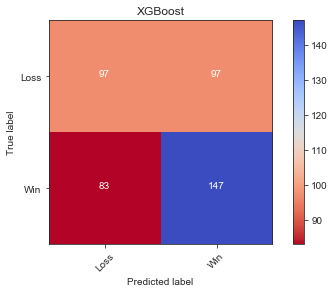

In [279]:
cm = confusion_matrix(y_test_final,xgb_pred)
classes = ['Loss', 'Win']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='XGBoost',
                          cmap=plt.cm.coolwarm_r)

In [267]:
fit_predict_classes(DummyClassifier(),X_train_final,y_train_final,X_test_final,y_test_final)

Training Accuracy score:  0.4837060702875399
Training F1 score:  0.514423076923077
Training ROC AUC score:  0.4816289239470257

Testing Accuracy score:  0.5306603773584906
Testing F1 score:  0.5756929637526652
Testing ROC AUC score:  0.5254370237561632


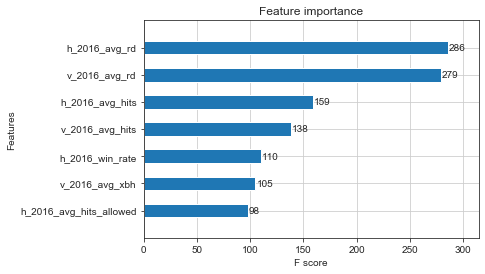

In [280]:
plot_importance(xgb, max_num_features=7,height = 0.5)

In [282]:
xgb_features = xgb.get_booster().get_fscore()

In [285]:
pd.DataFrame.from_dict(xgb_features, orient = 'index').sort_values(by = 0, ascending = False).head(50)

,0
h_2016_avg_rd,286
v_2016_avg_rd,279
h_2016_avg_hits,159
v_2016_avg_hits,138
h_2016_win_rate,110
v_2016_avg_xbh,105
h_2016_avg_hits_allowed,98
v_2016_avg_hits_allowed,82
h_2016_avg_on_base_by_pitcher,78
h_2016_avg_xbh,77


In [295]:
scaler = StandardScaler()
scaler.fit(X_train_final)
X_train_final =pd.DataFrame(data=scaler.transform(X_train_final), columns= X_train_final.columns)
X_test_final =pd.DataFrame(data=scaler.transform(X_test_final), columns = X_train_final.columns)

([<matplotlib.patches.Wedge at 0x1c32c105d0>],
 [Text(-0.12328735894344756, 1.0930691776483086, '')])

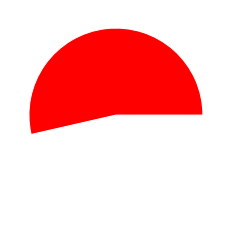